<a href="https://colab.research.google.com/github/ndnvo/Analysis_projects/blob/main/Olist%20Ecommerce%20Project%20-%20Delivery%20Analysis%20%26%20Optimization%20with%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** 🛒 🛍 How Can OLIST Marketplace Improve Delivery Estimation To Enhance Customers' Satisfaction  🛍 🛒 ** 

***👨🏼‍💻 Prepared by Duy Nghi & Karen, January 2021***

 🚩 Final project as a part of the course Fulltime DataScience @ CoderSchool 🏭

 <img src="https://storage.googleapis.com/kaggle-datasets-images/55151/105464/d59245a7014a35a35cc7f7b721de4dae/data-original.png?t=2018-09-21-16-21-21" style="width: 800px;"/>

 📈 Presentation slides of the analysis could be viewed here: [SLIDE
](https://drive.google.com/file/d/1ba9xUOGUE0L8Z9AN8YTWQ_uub6EzREH-/view?usp=sharing)

 📊 Interactive dashboard of the analysis using Tableau is available here: [DASHBOARD](https://public.tableau.com/views/OlistEcommerceDeliveryAnalysis/Story2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)





## 1. INTRODUCTION

#### **☆ Overview**

The datasets were assigned as the final project in the course Fulltime Data Science @ Coderschool.

This Brazilian ecommerce public dataset is quite famous on Kaggle, which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.



> This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

> After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.



* **🤖 Data schema:**

<img src="https://i.imgur.com/HRhd2Y0.png" alt="Drawing" style="width: 800px;"/>




| Table | Content |
|:--:|:--:|
| olist_customers_dataset | This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location. |
| olist_geolocation_dataset| This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.|
| olist_order_items_dataset | This dataset includes data about the items purchased within each order.|
| olist_order_payments_dataset | This dataset includes data about the orders payment options. |
| olist_order_reviews_dataset | This dataset includes data about the reviews made by the customers. |
| olist_orders_dataset | This is the core dataset. From each order you might find all other information.|
| olist_products_dataset | This dataset includes data about the products sold by Olist. |
| olist_sellers_dataset | This dataset includes data about the sellers that fulfilled orders made at Olist. |
| product_category_name_translation | Translates the productcategory name to English. |


Source of data: https://www.kaggle.com/olistbr/brazilian-ecommerce



#### **☆ Topic introduction**

**Key audience**: The operation team of Olist Ecommerce, the sellers who are participating in the e-market 

**Key question**: How can the delivery performance of Olist be improved?

Q1: Does delivery performance affect customer satisfaction?

Q2: Is Olist's delivery date estimation accurate and efficient?

Q3: What can be done to improve Olist's delivery estimation?



#### **☆ Key Findings**

Late delivery has a significant impact on the customer satisfaction (measured by rating score). Up to 2 days late delivery is still acceptable and has slightly negative effect on customer satisfaction.

 <img src="https://drive.google.com/uc?export=view&id=1uFaCNXIm8WOSOqdg59ICTOsR41hsmczE" style="width: 400px;"/>


Besides, very early does not have significant impact on customers' satisafaction.

 <img src="https://drive.google.com/uc?export=view&id=19l1aHIaT92EG2iO5CkKQyQSYJ_CY1nDr" style="width: 400px;"/>

Currently, Olist has been following a conservative approach when providing customer a delivery estimation. It has achieved certain success with this approach(On-time develiery ratio: 92%, ~ 80% ratings are 4-5*). However, the estimation has been too conservative (AVG: 24 days) in comparision with the actual delivery ability (~AVG: 12 days) and that would make Olist less competitive in the market.

 <img src="https://drive.google.com/uc?export=view&id=1bF4l1mBG-hW4mpfBjQjjOqxuouyxK7cm" style="width: 400px;"/>

Therefore, we recommend that Olist should consider being less conservative in delivery estimation to become more competitive by bringing down the estimation time and reducing the difference between actual & estimated delivery time. However, that needs to be carefully implemented to avoid increased in late shipment ratio ( which is what Olist has experienced during the last 3 months).

To help with a better delivery time estimation model, we have selected 13 features and adopt Machine Learning's regression models to try predict the delivery time with more precision. The best result we could achieve with the Linear Regression model is:

> R-square of 40%,

> MAE of 4 days; which is a significant improve from the previous 12 days

  <img src="https://drive.google.com/uc?export=view&id=1qSOuefgN0YUef39K75DLILaGu41NpZ3v" style="width: 400px;"/>
  
For the implementation of the new model, we suggest Olist to try it in cities with medium-sized of sales and high level of inaccuracy between actual and estimate delivery estimation. Furthermore, for each state and cities, we will select the top products with high values and high level of prediction inaccuracy
to perform the trials. All of this are carried out by using K-mean Clustering algorithm with appropriate metrics
 <img src="https://drive.google.com/uc?export=view&id=1fO50KIK6Ora0ePc1SH-S07k4DtdtO9Qt" style="width: 400px;"/>
  

### **☆ Challenges**

In this project, we have faced with some major challenged and we have learned a lot to overcome them and provide an insightful analysis:



## 2. PREPROCESS DATA

### 2.1 Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import math
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting wrapping text display for the workbook

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### 2.2 Explore Dataset

In [4]:
#Read the dataset to DF
customer = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_customers_dataset.csv")
location = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_geolocation_dataset.csv")
order_item = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_order_items_dataset.csv")
payment = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_order_payments_dataset.csv")
review = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_order_reviews_dataset.csv")
order = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_orders_dataset.csv")
product = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_products_dataset.csv")
seller = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/olist_sellers_dataset.csv")
category = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Final project/Data/product_category_name_translation.csv")


In [5]:
item_number = order_item.groupby("order_id").size().reset_index(name = "item_count")

| Table | Content |
|:--:|:--:|
| olist_customers_dataset | This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location. |
| olist_geolocation_dataset| This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.|
| olist_order_items_dataset | This dataset includes data about the items purchased within each order.|
| olist_order_payments_dataset | This dataset includes data about the orders payment options. |
| olist_order_reviews_dataset | This dataset includes data about the reviews made by the customers. |
| olist_orders_dataset | This is the core dataset. From each order you might find all other information.|
| olist_products_dataset | This dataset includes data about the products sold by Olist. |
| olist_sellers_dataset | This dataset includes data about the sellers that fulfilled orders made at Olist. |
| product_category_name_translation | Translates the productcategory name to English. |

For the purpose of the analysis, the key tables are: orders_dataset & order_reviews_dataset. However, we will also merge those tables with other tables to find out more interesting insights

### 2.3 Clean Datasets

ORDER TABLE (CORE TABLE)

In [6]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
#Check the status of the order
order.order_status.value_counts()/order.shape[0]

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

97% of the dataset records are of orders that have been delivered. 
This makes sense because the dataset only records orders dated back in 2018 and earlier.
For the purpose of the analysis, we will only select those orders that have been delivered

In [8]:
#Only select the delivered order
historical_order = order[order["order_status"] =="delivered"]

In [9]:
historical_order.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [10]:
#Fill in NULL approved date with purchase date:
historical_order.loc[historical_order["order_approved_at"].isnull(),"order_approved_at"] = historical_order["order_purchase_timestamp"]

In [11]:
#Fill in NULL delivered date with estimated delivery date:
historical_order.loc[historical_order["order_delivered_customer_date"].isnull(),"order_delivered_customer_date"] = historical_order["order_estimated_delivery_date"]

In [12]:
#Fill in NULL order_delivered_carrier_date with order_approved_at date:
historical_order.loc[historical_order["order_delivered_carrier_date"].isnull(),"order_delivered_carrier_date"] = historical_order["order_approved_at"]

In [13]:
#Verify there is no NULL value in the core DF
historical_order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [14]:
#Drop duplicates if there is any
historical_order.drop_duplicates(inplace=True)

In [15]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96478 non-null  object
 5   order_delivered_carrier_date   96478 non-null  object
 6   order_delivered_customer_date  96478 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


PRODUCT TABLE

In [16]:
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [17]:
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [18]:
#We can leave the missing category name, length, description, photo as it is because we might not use those columns for the analysis
product[product["product_category_name"].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [19]:
#Drop the two observations with NULL products' size and measures
product.dropna(subset = ["product_weight_g"], axis = 0, inplace=True)

In [20]:
product.isnull().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [21]:
#Eliminate if there is duplicated product id
product.drop_duplicates(subset=["product_id"], keep='first', inplace=True)

CUSTOMER TABLE

In [22]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
#Check for null value - looks good
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

SELLER

In [24]:
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [25]:
#Check for null value - looks good
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

ORDER ITEM TABLE

In [26]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
#Check for null value - looks good
order_item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

MERGE THE TABLES TO CREATE A FINAL DF READY FOR ANALYSIS

In [28]:
#Merge order with order_item on "Order_id"
historical_order = historical_order.merge(order_item, on = "order_id", how = "left")

In [29]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

🚨 This merge increases the number of lines as there might be multiple order_item_id in an order. We need to take this into account for further analysis on the level of order

In [30]:
#Merge order with product on "product_id"
historical_order = historical_order.merge(product, on = "product_id", how = "left")

In [31]:
#Check to see if the number of row is the same
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [32]:
#Merge order with seller on "seller_id"
historical_order = historical_order.merge(seller, on = "seller_id", how = "left")

In [33]:
#There are duplicated order_id in the review table ==> Drop duplicates, keep first before merging tables.
review[review.duplicated(subset="order_id")]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [34]:
review = review.drop_duplicates(subset=["order_id"],keep='first')

In [35]:
#Merge order with review on "order_id"
historical_order = historical_order.merge(review, on = "order_id", how = "left")

In [36]:
#Verify that the number of rows are the same after the merge
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [37]:
#Merge order with customer on "customer_id"
historical_order = historical_order.merge(customer, on = "customer_id", how = "left")

In [38]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [39]:
#Merge order with item_number on "customer_id"
historical_order = historical_order.merge(item_number, on = "order_id", how = "left")

In [40]:
historical_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,item_count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15

GEO LOCATION TABLES

In [41]:
#There are several long/lat values for the same prefix ==> need to fix the table using the average long/lat
location_agg = location.groupby("geolocation_zip_code_prefix").agg({"geolocation_lat":"mean","geolocation_lng":"mean"}).reset_index()

In [42]:
#Modify the location tables before joining
seller_location = location_agg.copy()
seller_location.columns = ("seller_zip_code_prefix","seller_lat","seller_long")
customer_location = location_agg.copy()
customer_location.columns = ("customer_zip_code_prefix","customer_lat","customer_long")

In [43]:
#Merge order table with the location tables
historical_order = historical_order.merge(seller_location, on = "seller_zip_code_prefix", how = "left")
historical_order = historical_order.merge(customer_location, on = "customer_zip_code_prefix", how = "left")


In [44]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

🚨 There are some missing values in the customer & sellers' long & lat. It is because there are some state_prefixes that are available in the order table but not in the geo table. => We will fill in these values using the average LONG & LAT of the city field

In [45]:
historical_order.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,item_count,seller_lat,seller_long,customer_lat,customer_long
48989,7a72862f08ad9a6b9debda8e2a65d762,49269e49bdad7f64f75afaf5939326c2,delivered,2017-03-10 19:47:34,2017-03-10 19:47:34,2017-03-15 07:32:12,2017-03-29 12:57:35,2017-04-18 00:00:00,1,7e0dc102074f8285580c9777f79c90cf,e26901d5ab434ce92fd9b5c256820a4e,2017-03-21 19:47:34,34.9,24.84,ferramentas_jardim,60.0,1251.0,2.0,800.0,30.0,10.0,30.0,9350,maua,SP,46aa90ce01cf1cfde093294cad8d4f51,5.0,NaN,produto muito bom nota 10,2017-03-30 00:00:00,2017-03-31 08:00:29,2a868fee78151c23540d4ecec8560e98,55900,goiana,PE,1,-23.680729,-46.444238,-7.562445,-34.999375
45767,27f7d43a44061f79fa0e259a3b9a7922,c96a1529c59cbf3fa1a38386f5458c0d,delivered,2018-04-22 21:26:51,2018-04-24 17:16:31,2018-04-23 23:41:42,2018-04-27 16:32:41,2018-05-15 00:00:00,2,d0c54febdabb86e59080ec565c461d1e,8bb48dc19fccaa8613b6229bf7f452a2,2018-04-26 22:31:53,39.6,18.25,ferramentas_jardim,36.0,136.0,1.0,1850.0,22.0,22.0,12.0,19803,assis,SP,1334b45dd88a051e84438b5f613e3fb7,5.0,NaN,O produto chegou bem antes do prazo informado.,2018-04-28 00:00:00,2018-04-29 11:35:13,4331ee3ae40a08428b13a6f0e5320f17,71699,brasilia,DF,2,-22.675680,-50.437556,-15.793097,-47.851616
12387,cff47646caf0e301a4622b80cc415cb9,c8dddeefdb81daac2796e6dd3fd3a661,delivered,2018-04-15 13:02:02,2018-04-15 13:15:10,2018-04-16 22:57:48,2018-04-23 14:03:42,2018-05-10 00:00:00,1,f282b8032570cf3ce692b8ea7e1b6c53,e8b4225284fbb02d16f200513f1f395d,2018-04-19 13:15:10,149.9,23.63,bebes,40.0,470.0,2.0,8350.0,44.0,32.0,35.0,14960,novo horizonte,SP,1663ca2b0d19b78fbc633eee468620c7,4.0,NaN,NaN,2018-04-24 00:00:00,2018-04-24 18:48:51,95e3fd1a57d6cb0f70e8a3f55d12bc7b,88813,criciuma,SC,1,-21.469601,-49.222217,-28.678034,-49.338835


In [46]:
location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [47]:
location_city_agg  = location.groupby("geolocation_city")[["geolocation_lat","geolocation_lng"]].mean().reset_index()
location_city_agg.columns = ["city","lat","long"]
location_city_agg = location_city_agg.set_index('city')
city_list = location_city_agg.index.tolist()

In [48]:
#Filter out the rows that city's name is not in the above list
historical_order = historical_order[(historical_order['customer_lat'].notnull())|(historical_order['customer_city'].isin(city_list))]

In [49]:
#Fill in the NULL value in seller & customer's long & lat using the location_city_agg table
historical_order.loc[historical_order['seller_lat'].isnull(), 'seller_lat'] = historical_order.loc[historical_order['seller_lat'].isnull(), 'seller_city'].apply(lambda x: location_city_agg.lat[x])
historical_order.loc[historical_order['seller_long'].isnull(), 'seller_long'] = historical_order.loc[historical_order['seller_long'].isnull(), 'seller_city'].apply(lambda x: location_city_agg.long[x])
historical_order.loc[historical_order['customer_lat'].isnull(), 'customer_lat'] = historical_order.loc[historical_order['customer_lat'].isnull(), 'customer_city'].apply(lambda x: location_city_agg.lat[x])
historical_order.loc[historical_order['customer_long'].isnull(), 'customer_long'] = historical_order.loc[historical_order['customer_long'].isnull(), 'customer_city'].apply(lambda x: location_city_agg.long[x])

In [50]:
#Calculate the distance between the sellers and buyer
import geopy.distance

def distance_calculate(row):
  coords_1 = (row.seller_lat, row.seller_long)
  coords_2 = (row.customer_lat, row.customer_long)
  return geopy.distance.vincenty(coords_1, coords_2).km


In [51]:
historical_order["shipping_distance"] = historical_order.apply(distance_calculate,axis =1)

In [52]:
#Merge with product_name_translation
historical_order = historical_order.merge(category, on = "product_category_name", how = "left")

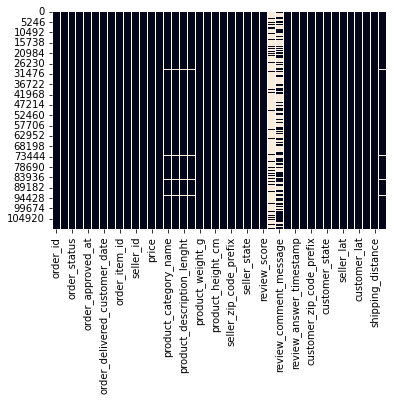

In [53]:
#Visualize the distribution of null_values
sns.heatmap(historical_order.isnull(), cbar=False)

In [54]:
#Group data by related fields
order_group = ["order_id",'order_purchase_timestamp','order_approved_at', 'order_item_id',"shipping_limit_date",'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',"shipping_distance","item_count"]
product_group = ['product_id','price', 'freight_value', 'product_category_name_english',
        'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']
review_group = ["review_score", "review_comment_message","review_creation_date","review_answer_timestamp"]
seller_group = ['seller_id','seller_city', 'seller_zip_code_prefix','seller_state','seller_lat', 'seller_long']
customer_group = ['customer_id','customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state','customer_lat', 'customer_long']

In [55]:
historical_order = historical_order[order_group + product_group + review_group + seller_group + customer_group]

In [56]:
historical_order.head()

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,1,2017-10-06 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.566632,1,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,500.0,19.0,8.0,13.0,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3504c0cb71d7fa48d967e0e4c94d59d9,maua,9350,SP,-23.680729,-46.444238,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,1,2018-07-30 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,847.437333,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumery,400.0,19.0,13.0,19.0,4.0,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,31570,SP,-19.807681,-43.980427,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,1,2018-08-13 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,512.100044,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,auto,420.0,24.0,19.0,21.0,5.0,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,14840,SP,-21.363502,-48.229601,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,1,2017-11-23 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1816.085655,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,450.0,30.0,10.0,20.0,5.0,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,66922902710d126a0e7d26b0e3805106,belo horizonte,31842,MG,-19.837682,-43.924053,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,1,2018-02-19 20:31:37,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,29.684401,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,stationery,250.0,51.0,15.0,15.0,5.0,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,8752,SP,-23.543395,-46.262086,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676370,-46.514627


### 2.4 Feature Engineering

#### 2.4.1  Day of weeks

In [57]:
#Convert datetime columns to datetime datatype
time_columns = ["order_purchase_timestamp","order_approved_at","shipping_limit_date","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","review_creation_date","review_answer_timestamp"]
for i in time_columns:
  historical_order[i] = pd.to_datetime(historical_order[i])

In [58]:
def weekend_weekday(row):
  if row["day_of_week"] >3:
    return "Weekends"
  else:
    return "Weekdays"

In [59]:
historical_order["day_of_week"] = historical_order["order_purchase_timestamp"].dt.dayofweek
historical_order["Day_type"] = historical_order.apply(weekend_weekday,axis = 1)

#### 2.4.2  Processing & delivery time

In [60]:
historical_order[historical_order["order_id"]=="1378f9601350615613cc8832d6789c5d"]

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,day_of_week,Day_type
109319,1378f9601350615613cc8832d6789c5d,2017-09-01 20:28:02,2017-09-13 22:03:51,1,2017-09-07 22:32:05,2017-09-04 18:07:55,2017-09-13 22:24:46,2017-09-29,969.573349,1,7307a453add3ce026e86d325ff2d60cd,106.9,18.0,toys,2233.0,29.0,23.0,29.0,5.0,NaN,2017-09-14,2017-09-19 16:41:33,f5f2ab9bdb6b30c14c61be68c5ed37da,porto ferreira,13660,SP,-21.866032,-47.478102,988126b4ddf725d9724e4318872ea2ae,507dc9becd4fc65635d90682dfa9d3a3,98900,santa rosa,RS,-27.865358,-54.470128,4,Weekends


In [61]:
historical_order["shipping_limit"] = historical_order["shipping_limit_date"] - historical_order["order_approved_at"]
historical_order["shipping_limit"] = historical_order['shipping_limit'].dt.total_seconds() / (24 * 60 * 60)
historical_order["processing_time"] = historical_order["order_delivered_carrier_date"] - historical_order["order_approved_at"]
historical_order["processing_time"] = historical_order['processing_time'].dt.total_seconds() / (24 * 60 * 60)
historical_order["estimated_time"] = historical_order["order_estimated_delivery_date"] - historical_order["order_approved_at"]
historical_order["estimated_time"] = historical_order['estimated_time'].dt.total_seconds() / (24 * 60 * 60)
historical_order["compared_with_estimate"] = historical_order["order_delivered_customer_date"] - historical_order["order_estimated_delivery_date"]
historical_order["delivery_diff"] = historical_order['compared_with_estimate'].dt.total_seconds() / (24 * 60 * 60)
#send_survey : time lapsed after the customer received the product until the survey is created in the system
historical_order["send_survey"] = historical_order["review_creation_date"] - historical_order["order_delivered_customer_date"]
historical_order["send_survey"] = historical_order['send_survey'].dt.total_seconds() / (24 * 60 * 60)
#submit_review : time lapsed after the customer receive the review form until they submit the review
historical_order["submit_review"] = historical_order["review_answer_timestamp"] - historical_order["review_creation_date"]
historical_order["submit_review"] = historical_order['submit_review'].dt.total_seconds() / (24 * 60 * 60)


In [62]:
#SIZE
historical_order["size"] = historical_order["product_length_cm"] * historical_order["product_length_cm"] * historical_order["product_width_cm"] 

#### 2.4.3 Using K-mean to generate further categorized groups


#### 2.4.3.1 Price

In [63]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110151 entries, 0 to 110150
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110151 non-null  object         
 1   order_purchase_timestamp       110151 non-null  datetime64[ns] 
 2   order_approved_at              110151 non-null  datetime64[ns] 
 3   order_item_id                  110151 non-null  int64          
 4   shipping_limit_date            110151 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110151 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110151 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110151 non-null  datetime64[ns] 
 8   shipping_distance              110151 non-null  float64        
 9   item_count                     110151 non-null  int64          
 10  product_id                     110151 non-null  object  

In [64]:
category_price = historical_order[["order_id","price"]]

In [65]:
#filter out outliers
category_price = category_price[np.abs(category_price.price-category_price.price.mean()) <= (3*category_price.price.std())]

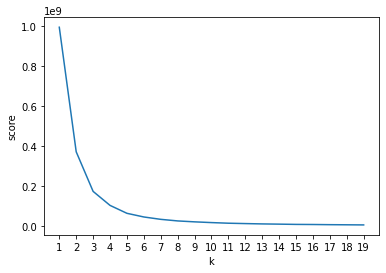

In [66]:
#APPLY KMEANS TO CLUSTER

from sklearn.cluster import KMeans

# Using Elbow method to approximate the number of clusters.

X = category_price["price"].values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

Based on this chart, we could use k = 3 to perform clusterning on price

In [67]:
# Call, fit the KMean model, and run prediction to find the cluster of each customer.
# YOUR CODE HERE
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
X_full = historical_order["price"].values.reshape(-1, 1)
clusters = kmeans.predict(X_full)

In [68]:
historical_order['Price_cluster'] = clusters
historical_order.head()

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,day_of_week,Day_type,shipping_limit,processing_time,estimated_time,compared_with_estimate,delivery_diff,send_survey,submit_review,size,Price_cluster
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,1,2017-10-06 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.566632,1,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,500.0,19.0,8.0,13.0,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3504c0cb71d7fa48d967e0e4c94d59d9,maua,9350,SP,-23.680729,-46.444238,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576983,-46.587161,0,Weekdays,4.000000,2.366493,15.536632,-8 days +21:25:13,-7.107488,0.107488,1.155417,4693.0,2
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,1,2018-07-30 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,847.437333,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumery,400.0,19.0,13.0,19.0,4.0,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,31570,SP,-19.807681,-43.980427,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711,1,Weekdays,4.000000,0.462882,17.858021,-6 days +15:27:45,-5.355729,0.355729,0.776273,6859.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,1,2018-08-13 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,512.100044,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,auto,420.0,24.0,19.0,21.0,5.0,NaN,2018-08-18,2018-08-22 19:07:58,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,14840,SP,-21.363502,-48.229601,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783,2,Weekdays,5.000000,0.204595,26.628206,-18 days +18:06:29,-17.245498,0.245498,4.797199,12096.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,1,2017-11-23 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1816.085655,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,450.0,30.0,10.0,20.0,5.0,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,66922902710d126a0e7d26b0e3805106,belo horizonte,31842,MG,-19.837682,-43.924053,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774190,-35.271143,5,Weekends,5.000000,3.745833,26.176400,-13 days +00:28:42,-12.980069,0.980069,2.806921,18000.0,2
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,1,2018-02-19 20:31:37,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,29.684401,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,stationery,250.0,51.0,15.0,15.0,5.0,NaN,2018-02-17,2018-02-18 13:02:51,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,8752,SP,-23.543395,-46.262086,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676370,-46.514627,1,Weekdays,5.924398,0.893113,12.069109,-10 days +18:17:02,-9.238171,0.238171,1.543646,39015.0,2


In [69]:
historical_order.groupby('Price_cluster')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Price_cluster,,,,,,,,
0,30134.0,161.341779,43.772085,106.90,124.99,149.9,189.90,282.3
1,7824.0,584.442242,435.406306,283.00,330.00,419.9,659.00,6735.0
2,72193.0,52.371244,26.374315,0.85,29.90,49.9,71.82,106.8


We have sucessfully cluster orders based on price. However, in order to use the cluster indices to be score, we need to rearrange the indices a bit. We will use the function below for this task (Make sure to set ascending = False)

In [70]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Rearange cluster in such order that the higher price, the higher the value 
       that order brings to us, so higher recency should result in a lower score."""

    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

historical_order = order_cluster('Price_cluster', 'price', historical_order, True)

Based on this clustering, we define the number as below:

0: Low value

1: Moderate value

2: High value

#### 2.4.3.2 Ordered frequency of product

In [71]:
historical_order.sample(5)

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,day_of_week,Day_type,shipping_limit,processing_time,estimated_time,compared_with_estimate,delivery_diff,send_survey,submit_review,size,Price_cluster
47723,728416b0db65935dbf78a0cc03e8d6f8,2018-02-06 16:10:09,2018-02-08 07:49:51,1,2018-02-14 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12,996.995082,4,368c6c730842d78016ad823897a372db,49.90,17.60,garden_tools,1650.0,30.0,22.0,30.0,1.0,"Faltam 3 lustres de minha compra, veio apenas ...",2018-02-22,2018-02-23 14:44:29,1f50f920176fa81dab994f9023523100,sao jose do rio preto,15025,SP,-20.806707,-49.389165,00066ccbe787a588c52bd5ff404590e3,15090f48004f3b0fc18a167ef82af4db,93525,novo hamburgo,RS,-29.668715,-51.117880,1,Weekdays,6.000000,6.506331,31.673715,-19 days +22:22:17,-18.067859,0.067859,1.614225,27000.0,0
47608,a986f64af20f1a662c8148f3608ea8df,2017-11-24 20:31:32,2017-11-24 23:34:22,1,2017-11-29 23:31:33,2017-11-30 16:19:05,2017-12-01 21:14:23,2017-12-08,88.107348,1,5d096ee78b3150e1dcab797e13884824,64.99,11.73,housewares,1600.0,25.0,25.0,25.0,5.0,NaN,2017-12-02,2017-12-03 23:42:47,53e4c6e0f4312d4d2107a8c9cddf45cd,pedreira,13920,SP,-22.740325,-46.896754,3267d6b8e3f2247707d8e946e1c97f97,75a6bc6fe55ddc11cf2b9fc925b84530,5038,sao paulo,SP,-23.514609,-46.699045,4,Weekends,4.998044,5.697720,13.017801,-7 days +21:14:23,-6.115012,0.115012,1.988044,15625.0,0
64441,c60a7bc7ab46cda8a60c952aacc83a17,2017-12-25 19:20:31,2017-12-25 19:30:23,1,2017-12-29 19:30:23,2017-12-28 18:22:30,2017-12-29 19:19:39,2018-01-15,31.686265,1,3c3e5e9de1f81dc29a6a8bc3e0fff6c0,6.00,7.78,fashion_bags_accessories,100.0,16.0,2.0,11.0,5.0,Satisfeita,2017-12-30,2018-01-02 14:09:05,76623fde66e6b63b59440fd34160512d,guarulhos,7124,SP,-23.433637,-46.533773,f86f4d4f571b4dbdc6339d76c009c832,e68456c20b50779c3bf1bc9fcf46c8ee,5802,sao paulo,SP,-23.658600,-46.725507,0,Weekdays,4.000000,2.952859,20.187234,-17 days +19:19:39,-16.194688,0.194688,3.589641,2816.0,0
93986,7c4281b08578a1e5e13e56814b3c6123,2017-07-18 14:01:45,2017-07-18 14:15:18,1,2017-07-25 14:15:18,2017-07-19 19:32:51,2017-07-24 21:37:35,2017-08-24,476.017598,1,3458b4c1fcbe46e2eedb48e00960a60e,157.00,18.00,bed_bath_table,1700.0,20.0,45.0,35.0,5.0,otimo produto,2017-07-25,2017-07-26 13:04:29,cfb1a033743668a192316f3c6d1d2671,votorantim,18110,SP,-23.543320,-47.457380,686ba249f6f98cc2610b58e5b9982e6a,70a8db6a5ae17c3a4e5df68bbeae451c,25963,teresopolis,RJ,-22.417677,-42.976721,1,Weekdays,7.000000,1.220521,36.406042,-31 days +21:37:35,-30.098900,0.098900,1.544780,14000.0,1
97498,ceca30e6de65f20adb181e92932941a3,2018-03-20 19:57:14,2018-03-20 20:10:25,1,2018-03-26 20:10:25,2018-03-21 19:54:23,2018-04-11 20:07:50,2018-04-12,405.705991,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,18.74,NaN,400.0,20.0,12.0,15.0,5.0,NaN,2018-04-12,2018-04-12 23:32:08,c826c40d7b19f62a09e2d7c5e7295ee2,guarulhos,7133,SP,-23.436711,-46.511340,caedd3b1bebfca71c001c276fb477fa2,d0064751457d0f903bd103e7a6a4998a,28800,rio bonito,RJ,-22.711928,-42.630041,1,Weekdays,6.000000,0.988866,22.159433,-1 days +20:07:50,-0.161227,0.161227,0.980648,6000.0,1


In [72]:
category_frequency = historical_order.groupby("product_id").size().sort_values().reset_index()
category_frequency.columns = ["product_id","frequency"]

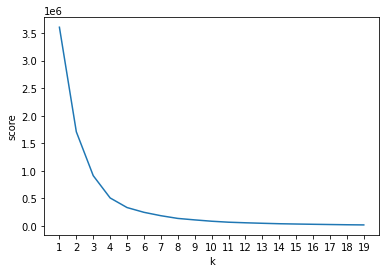

In [73]:
#APPLY KMEANS TO CLUSTER


# Using Elbow method to approximate the number of clusters.

X = category_frequency["frequency"].values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

Based on this chart, we could use k = 4 to perform clusterning on frequency

In [74]:
# Call, fit the KMean model, and run prediction to find the cluster of each customer.
# YOUR CODE HERE
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
category_frequency['Frequency_cluster'] = clusters


In [75]:
category_frequency.groupby('Frequency_cluster')["frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_cluster,,,,,,,,
0,31029.0,2.223017,2.168373,1.0,1.0,1.0,2.0,13.0
1,95.0,109.473684,36.488075,68.0,84.0,97.0,133.0,224.0
2,11.0,371.272727,91.489990,255.0,297.0,373.0,433.0,520.0
3,1069.0,24.966324,11.979101,14.0,16.0,21.0,30.0,67.0


In [76]:
#Rearrange the indices
category_frequency = order_cluster('Frequency_cluster', 'frequency', category_frequency, True)

In [77]:
category_frequency[category_frequency.frequency >68].sample(10)

,product_id,frequency,Frequency_cluster
32145,6c3effec7c8ddba466d4f03f982c7aa3,97,2
32194,3dd2a17168ec895c781a9191c1e95ad7,272,3
32113,18b0e642cbae7251e60a64aa07dd9eb9,73,2
32167,ec2d43cc59763ec91694573b31f1c29a,131,2
32183,a92930c327948861c015c919a0bcb4a8,156,2
32130,3f14d740544f37ece8a9e7bc8349797e,87,2
32179,437c05a395e9e47f9762e677a7068ce7,151,2
32157,0bcc3eeca39e1064258aa1e932269894,115,2
32114,5a6e53c3b4e8684b13388d6aa4afdf12,73,2
32154,84f456958365164420cfc80fbe4c7fab,108,2


In [78]:
#Merge to the historical_order table
historical_order = historical_order.merge(category_frequency, on = "product_id", how = "left")

Based on this clustering, we define the number as below:

0: Slow moving goods

1: Moderate moving goods

2: Fast moving goods

3: Very fast moving goods

#### 2.4.3.3 Product size

In [79]:
#Drop rows with no product size (only 18 rows)
historical_order = historical_order.dropna(axis = 0, subset = ["size"])

category_size = historical_order["size"]


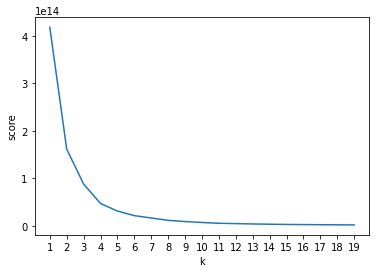

In [80]:
#APPLY KMEANS TO CLUSTER

# Using Elbow method to approximate the number of clusters.

X = category_size.values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

In [81]:
# Based on the elbow method, we should use k = 4 to cluster:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
historical_order['Size_cluster'] = clusters

In [82]:
historical_order.groupby('Size_cluster')["size"].describe().reset_index()

,Size_cluster,count,mean,std,min,25%,50%,75%,max
0,0,83413.0,11853.325357,9899.464106,384.0,4212.0,8000.0,16900.0,41772.0
1,1,3832.0,221227.237996,55314.166738,146853.0,180000.0,210983.0,266256.0,367744.0
2,2,22177.0,71713.121973,25107.077673,41876.0,51200.0,64000.0,89888.0,146205.0
3,3,711.0,514943.755274,136339.451752,371200.0,393660.0,490000.0,582760.5,900000.0


In [83]:
# Reorder the indices
historical_order = order_cluster('Size_cluster', 'size', historical_order, True)

Based on this clustering, we define the size as below:

0: Very small items

1: Small items

2: Large items

3: Very large items

#### 2.4.3.4 Busy level: number of order/day in each state

In [84]:
#Convert purchase time to week of the year
historical_order["week_day"] = historical_order["order_purchase_timestamp"].dt.strftime('%Y-%U')

In [85]:
order_by_state = historical_order.seller_state.value_counts().reset_index()
order_by_state.columns = ["state","order"]
order_by_state['pareto'] = (order_by_state["order"].cumsum() / order_by_state["order"].sum()) *100
order_by_state 


,state,order,pareto
0,SP,78551,71.323763
1,MG,8602,79.134319
2,PR,8483,86.836825
3,RJ,4684,91.089864
4,SC,3999,94.720928
5,RS,2169,96.690365
6,DF,883,97.492123
7,BA,623,98.057803
8,GO,507,98.518155
9,PE,445,98.922212


(0.0, 110.0)

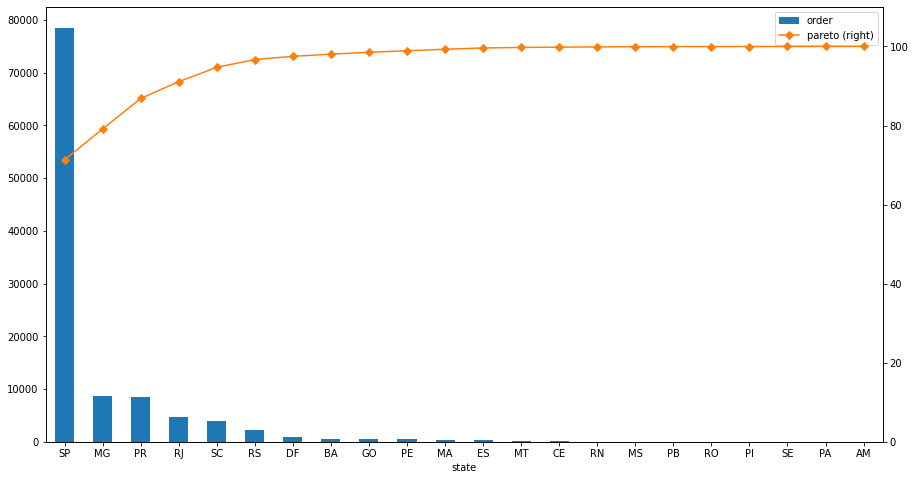

In [86]:
fig, axes = plt.subplots(figsize=(15,8))
ax1 = order_by_state.plot(x= "state", y='order',  kind='bar', ax=axes)
ax2 = order_by_state.plot(x= "state", y='pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])

~ 71% of the orders are generated in SP state.

~86% orders are from the top3 states

==> We might need to clustering the level in these state seperately to ensure the accuracy because different states might have different logistics capacity to handle the orders

Stategy: Ranking for the 3 major states, other states: Moderate


In [87]:
state_by_week = historical_order.groupby(["seller_state","week_day"],as_index=False).size().rename(columns = {"size":"order"})
state_by_week
sp_df = state_by_week[state_by_week["seller_state"]=="SP"]
mg_pr_df = state_by_week[state_by_week["seller_state"].isin(["MG","PR"])]

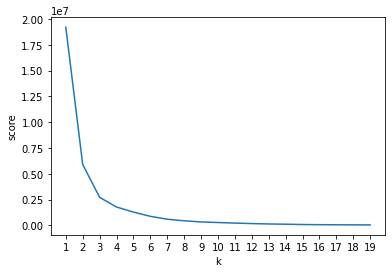

In [88]:
#APPLY KMEANS TO CLUSTER SP STATE

# Using Elbow method to approximate the number of clusters.

X = sp_df["order"].values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

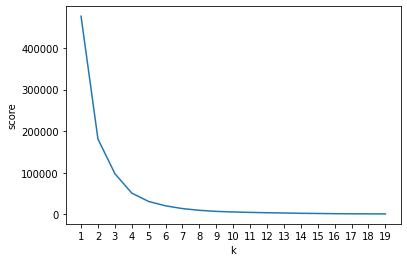

In [89]:
#APPLY KMEANS TO CLUSTER DF & PR STATE

# Using Elbow method to approximate the number of clusters.

X = mg_pr_df["order"].values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

To ensure the consistency in the number of cluster, we might use cluster number = 4 for both groups

In [90]:
#SP

X = sp_df["order"].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
sp_df['busy_cluster'] = clusters
#Rearrange the indices
sp_df = order_cluster('busy_cluster', 'order', sp_df, True)

In [91]:
sp = sp_df.groupby('busy_cluster')['order'].describe().reset_index()
sp["state"]= "SP"
sp

,busy_cluster,count,mean,std,min,25%,50%,75%,max,state
0,0,23.0,291.695652,162.023970,9.0,165.00,324.0,407.00,526.0,SP
1,1,35.0,784.771429,124.096046,567.0,695.50,781.0,849.50,1038.0,SP
2,2,30.0,1342.533333,140.943553,1121.0,1232.00,1334.5,1435.25,1628.0,SP
3,3,2.0,2049.500000,309.005663,1831.0,1940.25,2049.5,2158.75,2268.0,SP


In [92]:
#DF & PR
X = mg_pr_df["order"].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
mg_pr_df['busy_cluster'] = clusters

In [93]:
#Rearrange the indices
mg_pr_df = order_cluster('busy_cluster', 'order', mg_pr_df, True)

In [94]:
major_df = pd.concat([sp_df, mg_pr_df])
major_df 

,seller_state,week_day,order,busy_cluster
0,SP,2016-40,149,0
1,SP,2016-41,36,0
2,SP,2017-01,9,0
3,SP,2017-02,35,0
4,SP,2017-03,147,0
...,...,...,...,...
176,PR,2018-05,230,3
177,PR,2018-06,240,3
178,PR,2018-07,257,3
179,PR,2018-08,263,3


In [95]:
mg_pr = mg_pr_df.groupby('busy_cluster')['order'].describe().reset_index()
mg_pr["state"]= "MG-PR"
mg_pr

,busy_cluster,count,mean,std,min,25%,50%,75%,max,state
0,0,59.0,42.084746,19.755652,1.0,31.50,47.0,58.00,65.0,MG-PR
1,1,63.0,89.238095,12.508983,66.0,81.50,88.0,98.50,113.0,MG-PR
2,2,49.0,137.285714,15.360935,114.0,125.00,137.0,147.00,174.0,MG-PR
3,3,10.0,225.300000,29.295620,190.0,193.75,234.5,248.25,263.0,MG-PR


In [96]:
busy_cluster = pd.concat([sp,mg_pr])

In [97]:
busy_cluster

,busy_cluster,count,mean,std,min,25%,50%,75%,max,state
0,0,23.0,291.695652,162.023970,9.0,165.00,324.0,407.00,526.0,SP
1,1,35.0,784.771429,124.096046,567.0,695.50,781.0,849.50,1038.0,SP
2,2,30.0,1342.533333,140.943553,1121.0,1232.00,1334.5,1435.25,1628.0,SP
3,3,2.0,2049.500000,309.005663,1831.0,1940.25,2049.5,2158.75,2268.0,SP
0,0,59.0,42.084746,19.755652,1.0,31.50,47.0,58.00,65.0,MG-PR
1,1,63.0,89.238095,12.508983,66.0,81.50,88.0,98.50,113.0,MG-PR
2,2,49.0,137.285714,15.360935,114.0,125.00,137.0,147.00,174.0,MG-PR
3,3,10.0,225.300000,29.295620,190.0,193.75,234.5,248.25,263.0,MG-PR


In [98]:
#Export file to google drive!
busy_cluster.to_csv('/content/gdrive/MyDrive/Olist/busy_cluster.csv')

Cluster meaning:

0: Low number of orders

1: Moderate number of orders

2: High volume of orders

3: Very high volume of orders

In [99]:
#For other states we will set the busy_cluster as 1
other_df = state_by_week[~state_by_week["seller_state"].isin(["SP","MG","PR"])]
other_df["busy_cluster"] = 1
other_df

,seller_state,week_day,order,busy_cluster
0,AM,2017-05,1,1
1,AM,2017-11,2,1
2,BA,2016-40,1,1
3,BA,2017-02,2,1
4,BA,2017-04,1,1
...,...,...,...,...
1076,SE,2017-47,1,1
1077,SE,2017-48,1,1
1078,SE,2018-02,1,1
1079,SE,2018-28,1,1


In [100]:
#Concat all the table
category_busy_week = pd.concat([major_df, other_df])
category_busy_week.drop(columns = ["order"],inplace = True)
category_busy_week

,seller_state,week_day,busy_cluster
0,SP,2016-40,0
1,SP,2016-41,0
2,SP,2017-01,0
3,SP,2017-02,0
4,SP,2017-03,0
...,...,...,...
1076,SE,2017-47,1
1077,SE,2017-48,1
1078,SE,2018-02,1
1079,SE,2018-28,1


In [101]:
#Merge with core table
historical_order = historical_order.merge(category_busy_week, on = ["seller_state","week_day"], how = "left")

#### 2.4.3.5 Shipping distance

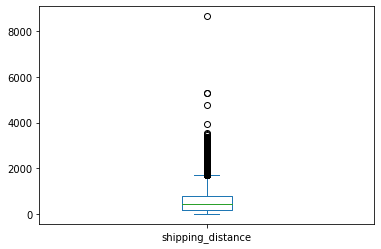

In [102]:
historical_order["shipping_distance"].plot.box()

In [103]:
historical_order["shipping_distance"].quantile([.1,.4,.7,.9])

0.1      34.268617
0.4     347.516087
0.7     690.002733
0.9    1442.905621
Name: shipping_distance, dtype: float64

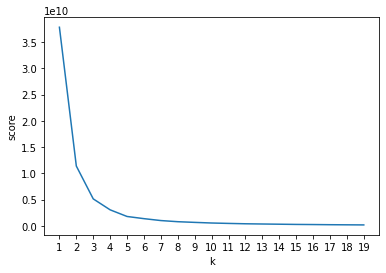

In [104]:
#APPLY KMEANS TO CLUSTER SP STATE

# Using Elbow method to approximate the number of clusters.

X = historical_order["shipping_distance"].values.reshape(-1, 1)

# Compute the Within-Cluster Sum of Square Score

wcss = []
k_values = range(1, 20)

for i in k_values:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

In [105]:
#Run Kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
historical_order['Distance_cluster'] = clusters
#Rearrange the indices
historical_order = order_cluster('Distance_cluster', 'shipping_distance', historical_order, True)

In [106]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110133 entries, 0 to 110132
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110133 non-null  object         
 1   order_purchase_timestamp       110133 non-null  datetime64[ns] 
 2   order_approved_at              110133 non-null  datetime64[ns] 
 3   order_item_id                  110133 non-null  int64          
 4   shipping_limit_date            110133 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110133 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110133 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110133 non-null  datetime64[ns] 
 8   shipping_distance              110133 non-null  float64        
 9   item_count                     110133 non-null  int64          
 10  product_id                     110133 non-null  object  

In [107]:
historical_order["product_category_name_english"].value_counts().head(30)

bed_bath_table                     10949
health_beauty                       9461
sports_leisure                      8428
furniture_decor                     8159
computers_accessories               7643
housewares                          6795
watches_gifts                       5857
telephony                           4428
garden_tools                        4264
auto                                4137
toys                                4027
cool_stuff                          3717
perfumery                           3336
baby                                2980
electronics                         2728
stationery                          2463
fashion_bags_accessories            1984
pet_shop                            1924
office_furniture                    1666
consoles_games                      1089
luggage_accessories                 1075
construction_tools_construction      916
home_appliances                      753
small_appliances                     658
musical_instrume

In [108]:
historical_order["product_category_name_english"].unique()

array(['housewares', 'stationery', 'auto', 'perfumery', 'bed_bath_table',
       'toys', 'health_beauty', 'electronics',
       'construction_tools_construction', 'furniture_decor',
       'small_appliances', 'sports_leisure', 'food', 'telephony',
       'cool_stuff', 'watches_gifts', 'fashion_underwear_beach',
       'fashion_bags_accessories', 'computers_accessories',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'industry_commerce_and_business', 'furniture_bedroom',
       'garden_tools', 'fixed_telephony', 'drinks', 'pet_shop',
       'books_general_interest', 'audio', 'baby', 'consoles_games',
       'home_construction', nan, 'construction_tools_safety',
       'home_appliances_2', 'cine_photo', 'fashion_shoes',
       'fashion_male_clothing', 'musical_instruments', 'fashion_sport',
       'flowers', 'food_drink', 'furniture_living_room', 'home_confort',
       'dvds_blu_ray', 'agro_industry_and_

In [109]:
historical_order.groupby("product_category_name_english")["size"].mean().sort_values(ascending = False)

product_category_name_english
furniture_mattress_and_upholstery    321139.270270
la_cuisine                           191968.928571
furniture_bedroom                    139847.242718
art                                  131934.532995
home_comfort_2                       113217.433333
                                         ...      
watches_gifts                          7793.615503
perfumery                              7711.556655
audio                                  7569.038674
food                                   6703.881526
telephony                              4794.398826
Name: size, Length: 71, dtype: float64

In [110]:
historical_order.groupby("product_category_name_english")["price"].mean().sort_values(ascending = False)

product_category_name_english
computers                                1098.915276
small_appliances_home_oven_and_coffee     638.213151
home_appliances_2                         467.333117
agro_industry_and_commerce                342.553883
musical_instruments                       283.127097
                                            ...     
food_drink                                 55.549740
cds_dvds_musicals                          52.142857
diapers_and_hygiene                        40.561892
flowers                                    33.637576
home_comfort_2                             25.342333
Name: price, Length: 71, dtype: float64

### 2.5 Filter out outliers

Too early or too late delivery

In [111]:
historical_order.sample(5)

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,day_of_week,Day_type,shipping_limit,processing_time,estimated_time,compared_with_estimate,delivery_diff,send_survey,submit_review,size,Price_cluster,frequency,Frequency_cluster,Size_cluster,week_day,busy_cluster,Distance_cluster
104292,4479256715e46f9c6ec0402a14889a5b,2018-04-12 16:06:54,2018-04-14 02:15:35,1,2018-04-19 02:15:35,2018-04-16 16:19:14,2018-05-02 22:58:39,2018-05-11,975.553180,1,e8ca1ff2d0a28edb5be8bfbf2964dc3a,49.00,23.28,sports_leisure,450.0,42.0,10.0,25.0,4.0,NaN,2018-05-03,2018-05-04 11:24:19,6b536a23086fba0d58c08d68814397f6,niteroi,24346,RJ,-22.949230,-43.028055,efe0f347fe4acd9f2fc67cad55efdd91,33162235fe25408e12a053052136ce91,95560,torres,RS,-29.341142,-49.744920,3,Weekdays,5.0,2.585868,26.905845,-9 days +22:58:39,-8.042604,0.042604,1.475220,44100.0,0,9,0,1,2018-14,1,1
3814,53fa1584e9fc3d9b50f19da601874fd5,2017-09-13 08:03:54,2017-09-13 08:24:41,1,2017-09-19 08:24:41,2017-09-14 08:41:59,2017-09-16 13:57:36,2017-09-27,29.313970,1,3c242072afadf856cb9471ea7ead620d,99.99,8.11,toys,400.0,20.0,20.0,20.0,4.0,NaN,2017-09-17,2017-09-19 12:57:02,46dc3b2cc0980fb8ec44634e21d2718e,rio de janeiro,22240,RJ,-22.935263,-43.187264,c348bc75888d19850f16cc205013a3af,47d247db5e582120cf919464317250ce,26570,mesquita,RJ,-22.778147,-43.417134,2,Weekdays,6.0,1.012014,13.649525,-11 days +13:57:36,-10.418333,0.418333,2.539606,8000.0,0,3,0,0,2017-37,1,0
94491,e05b2ef0e6f68745846dba198590cb80,2017-12-11 09:28:15,2017-12-11 09:35:27,1,2017-12-15 09:35:27,2017-12-14 17:37:17,2017-12-18 19:55:44,2018-01-11,716.491594,1,62c89abe1afe3a23c17765d462718a4c,233.00,17.39,perfumery,540.0,23.0,13.0,19.0,4.0,NaN,2017-12-19,2017-12-29 13:50:37,fe2032dab1a61af8794248c8196565c9,campinas,13030,SP,-22.924970,-47.074284,3404fbd3964c5abd6fe76ae239b0bd29,5373d3bd71b05d85cc1b76a125943527,89760,ita,SC,-27.269215,-52.339145,0,Weekdays,4.0,3.334606,30.600382,-24 days +19:55:44,-23.169630,0.169630,10.576817,10051.0,1,16,1,0,2017-50,2,1
84368,906368486fd64a44a16e7190972e3f3d,2017-07-25 11:07:09,2017-07-25 11:23:19,1,2017-07-31 11:23:19,2017-07-26 14:22:22,2017-08-17 17:59:02,2017-08-24,1360.908162,1,9bb2d066e4b33b624cbdfec7d50b3dcb,89.50,27.17,pet_shop,900.0,26.0,19.0,23.0,5.0,NaN,2017-08-18,2017-08-20 23:45:14,5cf13accae3222c70a9cac40818ae839,patos de minas,38700,MG,-18.595141,-46.518679,8ca3f53ee03ef2d704294900becc8be4,604370d28a287c6f42754c73f66bd1c3,96745,charqueadas,RS,-29.962705,-51.618643,1,Weekdays,6.0,1.124340,29.525475,-7 days +17:59:02,-6.250671,0.250671,2.989745,15548.0,0,15,1,0,2017-30,1,1
18532,1c7337cab00bdcc8c9aaa8b1c2671a85,2018-05-15 16:42:36,2018-05-16 03:54:58,1,2018-05-28 03:54:58,2018-05-16 13:38:00,2018-05-21 12:38:48,2018-06-07,259.242076,2,89b121bee266dcd25688a1ba72eefb61,79.90,13.00,computers_accessories,150.0,16.0,16.0,16.0,5.0,Comprei o produto dia 15/05...Dia 21/05 Já rec...,2018-05-22,2018-05-24 15:57:25,2eb70248d66e0e3ef83659f71b244378,campinas,13101,SP,-22.914020,-47.013535,1fb6b836b3bbbd5de824d8d2b0e24974,2a357a879d61172c33daeae85b0539f7,14620,orlandia,SP,-20.716824,-47.879535,1,Weekdays,12.0,0.404884,21.836829,-17 days +12:38:48,-16.473056,0.473056,2.664873,4096.0,0,63,1,0,2018-19,2,0


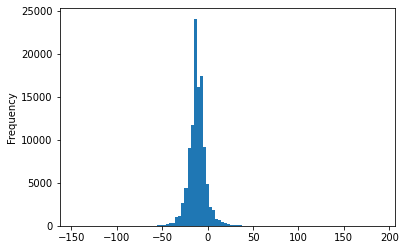

In [112]:
historical_order["delivery_diff"].plot(kind = "hist", bins = 100)

In [113]:
historical_order["delivery_diff"].describe()

count    110133.000000
mean        -11.333916
std          10.157853
min        -146.016123
25%         -16.320810
50%         -12.047164
75%          -6.477060
max         188.975081
Name: delivery_diff, dtype: float64

In [114]:
historical_order["delivery_diff"].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

0.10   -21.377292
0.20   -18.102030
0.30   -15.181440
0.40   -13.272600
0.50   -12.047164
0.60    -9.905076
0.70    -7.466264
0.80    -5.455229
0.90    -1.213060
0.95     3.681801
Name: delivery_diff, dtype: float64

**💫 Finding**

Most of the orders are delivered on time (>90%).
60% of the orders are even delivered earlier than the expected time.
There are some outliers in the delivery time (146 days earlier or 188 days late) ==> need to filter out before performing machine learning for prediction

In [115]:
# 1. Calculate the quantiles
q1 = historical_order["delivery_diff"].quantile(0.25)
q3 = historical_order["delivery_diff"].quantile(0.75)

# Calculate the interquantile range
iqr = q3 - q1
# 2. Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [116]:
print(upper)
print(lower)

8.288564814814816
-31.086435185185184


In [117]:
#Filter out outliers
historical_order_no_outlier = historical_order[(lower < historical_order["delivery_diff"]) & (historical_order["delivery_diff"] < upper)]

In [118]:
historical_order.sample(2)

,order_id,order_purchase_timestamp,order_approved_at,order_item_id,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_distance,item_count,product_id,price,freight_value,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_city,seller_zip_code_prefix,seller_state,seller_lat,seller_long,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,day_of_week,Day_type,shipping_limit,processing_time,estimated_time,compared_with_estimate,delivery_diff,send_survey,submit_review,size,Price_cluster,frequency,Frequency_cluster,Size_cluster,week_day,busy_cluster,Distance_cluster
26029,caa321f911edb4b272c5e4aa6df6be81,2017-07-16 20:13:21,2017-07-18 06:10:24,1,2017-07-24 06:10:24,2017-07-21 16:36:01,2017-07-26 04:41:55,2017-07-28,21.242552,2,c37e775cc9f2dd910db751444447fa3d,11.99,7.78,electronics,150.0,19.0,14.0,19.0,5.0,NaN,2017-07-26,2017-07-27 23:13:00,8fdca8e349553f99bc738833a62c8802,sao paulo,2189,SP,-23.507787,-46.567468,cbd7f2280c571b565374cff6887d1ab7,2273edfcec0422fe9279dacac772e931,5374,sao paulo,SP,-23.579225,-46.760540,6,Weekends,6.0,3.434456,9.742778,-2 days +04:41:55,-1.804225,-0.195775,1.967361,6859.0,0,8,0,0,2017-29,1,0
11115,599d6e8a6c48719bfc536e4f6e65b92e,2017-12-11 15:42:35,2017-12-11 15:53:32,1,2017-12-15 15:53:32,2017-12-12 20:26:46,2017-12-13 17:57:01,2017-12-28,3.948648,1,4e064cdbe4079c84a33181a96cf5609b,49.00,7.78,watches_gifts,200.0,16.0,2.0,11.0,5.0,NaN,2017-12-14,2017-12-14 21:24:14,6560211a19b47992c3666cc44a7e94c0,sao paulo,5849,SP,-23.652366,-46.755753,d1c625e57026a199bca1ed772f6fb89e,28159e14ccceb47cea801c301b8b102d,5642,sao paulo,SP,-23.621695,-46.736023,0,Weekdays,4.0,1.189745,16.337824,-15 days +17:57:01,-14.252072,0.252072,0.891829,2816.0,0,8,0,0,2017-50,2,0


SHIPPING SPEAD BY STATE FOR EACH SIZE

In [119]:
speed = historical_order.groupby(["seller_state",'customer_state'])[['estimated_time','delivery_diff','shipping_distance']].sum().reset_index()
speed["shipping_speed"] = speed["shipping_distance"] / (speed["estimated_time"]+ speed["delivery_diff"])
speed = speed[["seller_state","customer_state","shipping_speed"]]
speed


,seller_state,customer_state,shipping_speed
0,AM,AL,30.508356
1,AM,MA,56.282845
2,AM,MG,110.428974
3,BA,AC,48.285449
4,BA,AL,37.065487
...,...,...,...
407,SP,RS,58.499024
408,SP,SC,36.728608
409,SP,SE,82.709306
410,SP,SP,20.097549


### 2.6 Rename & filter necessary columns

In [120]:
historical_order = historical_order.merge(speed, on = ["seller_state","customer_state"], how = "left")

In [121]:
#CLEAN THE NAME

historical_order = historical_order.rename(columns = {"product_category_name_english":"product_category","Day_type":"day_type",
                                            'Price_cluster':"price_cluster",'Frequency_cluster':"frequency_cluster",'Distance_cluster':"distance_cluster", "Size_cluster":"size_cluster",
                                            "order_purchase_timestamp":"purchase_time","order_delivered_customer_date":"delivery_time","order_estimated_delivery_date":"estimated_delivery_time"
                                            })

In [122]:
#ONLY SELECT MEANINGFUL COLUMNS FOR ANALYSIS

historical_order = historical_order[['order_id', "item_count",'purchase_time', 'order_item_id','delivery_time',
       'estimated_delivery_time', 'shipping_distance','distance_cluster', 'product_id', 'price', 'price_cluster',
       'freight_value', 'product_category', 'product_weight_g',
       'review_score', 'seller_id', 'seller_city', 'seller_state',
       'customer_id', 'customer_unique_id','customer_city', 'customer_state',
       'day_of_week', 'day_type', 'shipping_limit', 'processing_time',
       'estimated_time','delivery_diff','send_survey', 'submit_review', 'size', 'size_cluster', 'frequency',
       'frequency_cluster', 'week_day', 'busy_cluster',"shipping_speed"]]

In [123]:
historical_order.head(5)

,order_id,item_count,purchase_time,order_item_id,delivery_time,estimated_delivery_time,shipping_distance,distance_cluster,product_id,price,price_cluster,freight_value,product_category,product_weight_g,review_score,seller_id,seller_city,seller_state,customer_id,customer_unique_id,customer_city,customer_state,day_of_week,day_type,shipping_limit,processing_time,estimated_time,delivery_diff,send_survey,submit_review,size,size_cluster,frequency,frequency_cluster,week_day,busy_cluster,shipping_speed
0,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,1,2017-10-10 21:25:13,2017-10-18,18.566632,0,87285b34884572647811a353c7ac498a,29.99,0,8.72,housewares,500.0,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0,Weekdays,4.000000,2.366493,15.536632,-7.107488,0.107488,1.155417,4693.0,0,4,0,2017-40,1,20.097549
1,ad21c59c0840e6cb83a9ceb5573f8159,1,2018-02-13 21:18:39,1,2018-02-16 18:17:02,2018-02-26,29.684401,0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,0,8.72,stationery,250.0,5.0,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,Weekdays,5.924398,0.893113,12.069109,-9.238171,0.238171,1.543646,39015.0,0,40,1,2018-06,2,20.097549
2,6514b8ad8028c9f2cc2374ded245783f,1,2017-05-16 13:10:30,1,2017-05-26 12:55:51,2017-06-07,322.781779,0,4520766ec412348b8d4caa5e8a18c464,59.99,0,15.17,auto,50.0,5.0,16090f2ca825584b5a147ab24aa30c86,atibaia,SP,9bdf08b4b3b52b5526ff42d37d47f222,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ,1,Weekdays,6.000000,5.864988,21.442928,-11.461215,0.461215,1.124965,4352.0,0,53,1,2017-20,1,28.218184
3,82566a660a982b15fb86e904c8d32918,1,2018-06-07 10:06:19,1,2018-06-19 12:05:52,2018-07-18,452.355874,0,72a97c271b2e429974398f46b93ae530,31.90,0,18.23,perfumery,450.0,5.0,094ced053e257ae8cae57205592d6712,ribeirao preto,SP,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG,3,Weekdays,9.000000,2.427639,38.865833,-28.495926,0.495926,0.646863,4096.0,0,1,0,2018-22,2,41.731070
4,5ff96c15d0b717ac6ad1f3d77225a350,1,2018-07-25 17:44:10,1,2018-07-30 15:52:25,2018-08-08,308.760320,0,10adb53d8faa890ca7c2f0cbcb68d777,19.90,0,12.80,bed_bath_table,200.0,5.0,1900267e848ceeba8fa32d80c1a5f5a8,ibitinga,SP,19402a48fe860416adf93348aba37740,e2dfa3127fedbbca9707b36304996dab,sao paulo,SP,2,Weekdays,2.000000,0.806088,13.253310,-8.338600,0.338600,2.885556,4096.0,0,20,1,2018-29,2,20.097549


### 2.7 Some notice about the dataset

(*): Frequency of customers

In [124]:
#1st glance on the dataset
count = historical_order.customer_unique_id.value_counts().reset_index()
count.groupby("customer_unique_id").size()/historical_order.shape[0]

customer_unique_id
1     0.741776
2     0.079831
3     0.014946
4     0.005639
5     0.002188
6     0.001725
7     0.000409
8     0.000145
9     0.000091
10    0.000100
11    0.000100
12    0.000082
13    0.000018
14    0.000027
15    0.000027
18    0.000009
20    0.000018
21    0.000009
24    0.000009
dtype: float64

🚨 Nearly 75% of customer only placed 1 order throughout the whole period 
=> This might affect further analysis => Keep this in mind

For example, it is not practical to perform customer segmentation using Frequency

(*) Number of orders with multiple items

In [125]:
item_count = historical_order.order_id.value_counts().reset_index()
item_count = item_count.groupby("order_id")["index"].count().reset_index()
item_count.columns = ["number_of_items","count"]
item_count['pareto'] = (item_count["count"].cumsum() / item_count["count"].sum()) *100
item_count

,number_of_items,count,pareto
0,1,86783,90.008920
1,2,7390,97.673623
2,3,1306,99.028170
3,4,495,99.541570
4,5,193,99.741744
5,6,191,99.939844
6,7,22,99.962662
7,8,8,99.970959
8,9,3,99.974071
9,10,8,99.982368


(0.0, 110.0)

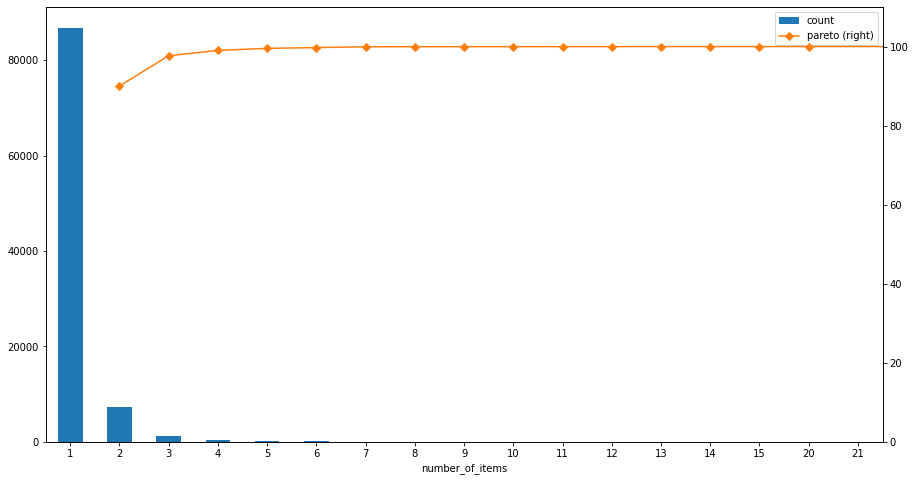

In [126]:
fig, axes = plt.subplots(figsize=(15,8))
ax1 = item_count.plot(x= "number_of_items", y='count',  kind='bar', ax=axes)
ax2 = item_count.plot(x= "number_of_items", y='pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])

90% of order only consists of 1 items 
=> We will create a new feature: Single item order or multiple items orders

## 3. DATA ANALYSIS

### **3.1. Q1: Does delivery performance affect customer satisfaction**

In terms of delivery performance, we will use the following metrics:

- The percentage of orders that are delivered later than the estimated delivery date / total orders
- Consistency of ontime delivery throughout the time
:- The average time it takes to deliver products to customers (per distance)
- Customer satisfaction is defined as the average rating score in this analysis


### **3.1.1. Identify the late shipment ratio of OLIST** **bold text**

In [127]:
#In the merged DF, there are duplicated order_id as one order might have multiple order_items ==> Filter out first
unique_order = historical_order.drop_duplicates(subset = "order_id", keep='first')

In [128]:
#First, we define lateshipment as orders that were delivered after the estimated delivery time:
unique_order['shipment_status'] = np.where(unique_order['delivery_diff'] > 0, 'Late', 'On time')

In [129]:
unique_order.purchase_time.describe()

count                   96416
unique                  95896
top       2017-11-20 11:46:30
freq                        3
first     2016-09-15 12:16:38
last      2018-08-29 15:00:37
Name: purchase_time, dtype: object

In [130]:
unique_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96416 entries, 0 to 110131
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 96416 non-null  object        
 1   item_count               96416 non-null  int64         
 2   purchase_time            96416 non-null  datetime64[ns]
 3   order_item_id            96416 non-null  int64         
 4   delivery_time            96416 non-null  datetime64[ns]
 5   estimated_delivery_time  96416 non-null  datetime64[ns]
 6   shipping_distance        96416 non-null  float64       
 7   distance_cluster         96416 non-null  int64         
 8   product_id               96416 non-null  object        
 9   price                    96416 non-null  float64       
 10  price_cluster            96416 non-null  int64         
 11  freight_value            96416 non-null  float64       
 12  product_category         95052 

In [131]:
unique_order.shipment_status.value_counts()

On time    88601
Late        7815
Name: shipment_status, dtype: int64

In [132]:
pie_shipment = unique_order.shipment_status.value_counts()/unique_order.shape[0]

pie_shipment

On time    0.918945
Late       0.081055
Name: shipment_status, dtype: float64

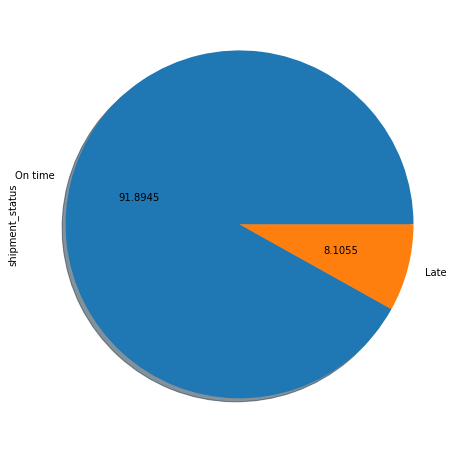

In [133]:
pie_shipment.plot(kind="pie",autopct='%.4f', shadow=True,figsize=(8, 8))

**💫 Finding:**

92% percent of order have been shipped on time.
Nearly 8% of the orders' shipments were late.
This indicates that the Olist Ecommece marketplace has been handling delivery quite well and has successfully satisfy the estimated delivery date

### **3.1.2. Consistency of ontime shipment ratio over time**

In [134]:
unique_order['order_month_year'] = pd.to_datetime(unique_order['purchase_time']).dt.to_period('M')

In [135]:
#Extract file to google drive for visualizaion
unique_order.to_csv('/content/gdrive/MyDrive/Olist/unique_order.csv')


In [136]:
order_status_time = unique_order.groupby(["order_month_year","shipment_status"]).size().reset_index()
order_status_time.columns = ("time","shipment_status","count")
order_status_time["percent"] = order_status_time["count"].div(
    order_status_time.groupby('time')['count'].transform(lambda x: x.sum()))
late_shipment = order_status_time[order_status_time["shipment_status"]=="Late"]
late_shipment["total_order"] = late_shipment["count"]/ late_shipment["percent"]

In [137]:
late_shipment.sort_values("percent",ascending = False)

,time,shipment_status,count,percent,total_order
0,2016-09,Late,1,1.000000,1.0
32,2018-03,Late,1493,0.213438,6995.0
30,2018-02,Late,1047,0.159823,6551.0
24,2017-11,Late,1043,0.143191,7284.0
42,2018-08,Late,660,0.103953,6349.0
26,2017-12,Late,462,0.083802,5513.0
36,2018-05,Late,556,0.082407,6747.0
10,2017-04,Late,181,0.078798,2297.0
28,2018-01,Late,464,0.065639,7069.0
8,2017-03,Late,140,0.055118,2540.0


In [138]:
late_shipment = late_shipment.sort_values("time",ascending = True)

In [139]:
late_shipment = late_shipment.iloc[1:,:]

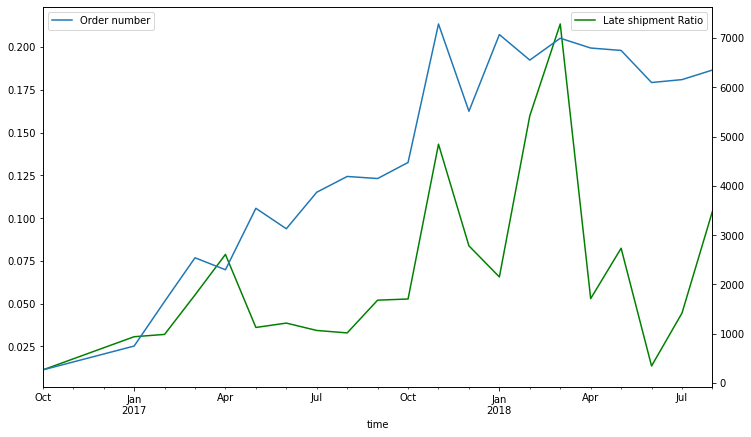

In [140]:
import matplotlib.dates as mdates

#Filter out the first period (only 1 order)

ax1 = late_shipment.plot(x="time", y ="percent",color="g", label = "Late shipment Ratio", figsize=(12, 7))
ax2 = ax1.twinx()
late_shipment.plot(x="time", y ="total_order",ax=ax2, label = "Order number")
ax2.legend(loc='upper left')
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# plt.gcf().autofmt_xdate()


**💫 Finding:**

There are 3 months in which the late shipment rates peaked and were significantly higher than the norm.

We need to do more analysis and research to find out what happened in these periods

In [141]:
late_shipment.sort_values("percent",ascending = False).head(3)

,time,shipment_status,count,percent,total_order
32,2018-03,Late,1493,0.213438,6995.0
30,2018-02,Late,1047,0.159823,6551.0
24,2017-11,Late,1043,0.143191,7284.0


### **3.1.3 Does delivery performance affect customer's satisfaction?**

Customer satisfaction is measured by the average mean of review score

In [142]:
#DROP DROW WHERE review_score is NULL
delivery_comment_df  = unique_order.dropna(subset = ["review_score"], axis = 0)

In [143]:
delivery_comment_df = delivery_comment_df[["purchase_time","shipping_distance","price","freight_value","product_category","product_weight_g","review_score","estimated_time","delivery_diff","size"]]

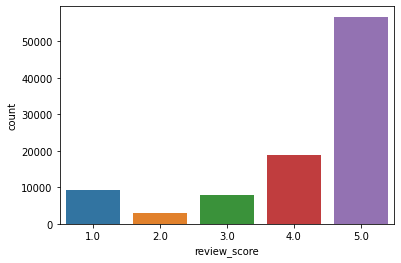

In [144]:
sns.countplot(data = delivery_comment_df, x = "review_score")

Most of the ratings are belong to 4-5 stars

In [145]:
delivery_comment_df.review_score.value_counts()/delivery_comment_df.shape[0]

5.0    0.592231
4.0    0.197202
1.0    0.097515
3.0    0.082542
2.0    0.030511
Name: review_score, dtype: float64

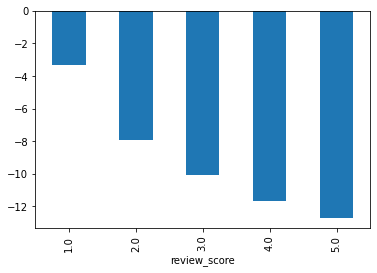

In [146]:
mean_delivery_rate = delivery_comment_df.groupby("review_score")["delivery_diff"].mean().plot(kind = "bar")

The y-axis is negative value => days earlier than the estimated day.
Finding: The earlier you can deliver to the customer, the higher ratings you can get

BUSY CLUSTER

In [147]:
unique_order.groupby("busy_cluster")["review_score"].mean()

busy_cluster
0    4.183052
1    4.232239
2    4.113001
3    3.854008
Name: review_score, dtype: float64

**💫 KEY Finding**

During busy order time, the average rating also is also lower than the norm.

So we can conclude that: When there are too many orders in a day, the Olist Ecommerce system might not handle the shipment well and that would lead to a lower customer satisfaction (in terms of the avg rating score)

Let's look closer to see what kinds of goods are usually shipped late during the peak days

In [148]:
unique_order.groupby(["busy_cluster","size_cluster"])["review_score"].mean()

busy_cluster  size_cluster
0             0               4.197655
              1               4.121348
              2               4.254692
              3               4.142857
1             0               4.245633
              1               4.185368
              2               4.233403
              3               3.990050
2             0               4.128162
              1               4.065179
              2               4.120235
              3               3.758621
3             0               3.879395
              1               3.740488
              2               3.892473
              3               3.928571
Name: review_score, dtype: float64

**💫 Finding**
During the low-peak season ( busy level: 0-1), the Ecommerce handle the bulky items quite well, but in the high peak seasons ( busy cluster = 2), it starts to have some issues with handling the bulky items. 

In very high peak seasons (busy = 3), all shipment activities were delayed, even for the small items

SO WE NEED TO KNOW WHICH DAY OF THE WEEK - WHICH MONTH USUALLY HAS THE HIGHEST NUMBER OF BUSY CLUSTER 3 - SO WE CAN HIRE MORE EMPLOYEES/ PLAN BETTER ==> OPTIONAL FOR ANALYSIS

Deep dive into the peak seasons to see the avearage rating of on time - late shipment

In [149]:
unique_order[unique_order["busy_cluster"]==3].groupby("shipment_status")["review_score"].mean()

shipment_status
Late       2.271565
On time    4.188824
Name: review_score, dtype: float64

**💫 BIG Finding**

For orders on peak days, the late delivery really affects how customers rate the order

### **3.2 Is the current delivery estimation of Olist accurate and efficient?**

In [150]:
unique_order["delivery_diff"].describe()

count    96416.000000
mean       -11.180244
std         10.181509
min       -146.016123
25%        -16.244112
50%        -11.949514
75%         -6.390336
max        188.975081
Name: delivery_diff, dtype: float64

Filter out extreme values

In [151]:
unique_order_filtered = unique_order[(lower < unique_order["delivery_diff"]) & (unique_order["delivery_diff"] < upper)]

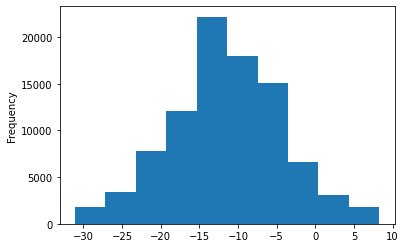

In [152]:
unique_order_filtered["delivery_diff"].plot.hist()

Finding: Faily distributed, however now around the 0 value.
The ecommerce system tends to predict earlier than the reality
The mode is around 10-15 days earlier than the real delivery date.

### **3.3 USE MACHINE LEARNING MODELS TO IMPROVE OLIST's DELIVERY ESTIMATION**

### **3.3.1 EXPLORE THE POTENTIAL FEATURES WITH HIGH CORRELATION TO THE TARGET VARIABLE**

- **PRICE CLUSTER**

In [153]:
shipment_price = unique_order.groupby("price_cluster")["shipment_status"].value_counts()
shipment_price.groupby(level=[0]).apply(lambda g: g / g.sum())

price_cluster  shipment_status
0              On time            0.923620
               Late               0.076380
1              On time            0.913776
               Late               0.086224
2              On time            0.898971
               Late               0.101029
Name: shipment_status, dtype: float64

There is no significant difference in the shipment rate between price cluster




- **SIZE CLUSTER**

In [154]:
shipment_size = unique_order.groupby("size_cluster")["shipment_status"].value_counts()
shipment_size = shipment_size.groupby(level=[0]).apply(lambda g: g / g.sum())
shipment_size = shipment_size.reset_index(name="percent")
shipment_size

,size_cluster,shipment_status,percent
0,0,On time,0.921124
1,0,Late,0.078876
2,1,On time,0.914936
3,1,Late,0.085064
4,2,On time,0.903016
5,2,Late,0.096984
6,3,On time,0.872075
7,3,Late,0.127925


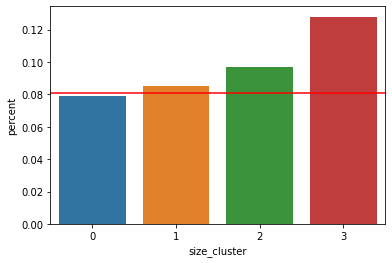

In [155]:
late_shipment_size = shipment_size.query("shipment_status == 'Late'")
sns.barplot(data =late_shipment_size, x= "size_cluster", y ="percent" )
plt.axhline( y= pie_shipment["Late"], color = "red")

**💫 Finding**:

It is clear that that lateshipment ratio is correlated with the size.
The bigger items tend have higher rate of late shipment.
==> This is a good feature for the machine learning model

- **FREQUENCY**


In [156]:
shipment_frequency = unique_order.groupby("frequency_cluster")["shipment_status"].value_counts()
shipment_frequency.groupby(level=[0]).apply(lambda g: g / g.sum())

frequency_cluster  shipment_status
0                  On time            0.920251
                   Late               0.079749
1                  On time            0.922045
                   Late               0.077955
2                  On time            0.903149
                   Late               0.096851
3                  On time            0.917377
                   Late               0.082623
Name: shipment_status, dtype: float64

There is no significant difference in the late shipment rate between products with different popularity (frequency of being ordered) levels

- **BUSY ORDER TIME**

In [157]:
shipment_busy = unique_order.groupby("busy_cluster")["shipment_status"].value_counts()
shipment_busy = shipment_busy.groupby(level=[0]).apply(lambda g: g / g.sum())
shipment_busy = shipment_busy.reset_index(name="percent")
shipment_busy

,busy_cluster,shipment_status,percent
0,0,On time,0.949296
1,0,Late,0.050704
2,1,On time,0.945030
3,1,Late,0.054970
4,2,On time,0.898819
5,2,Late,0.101181
6,3,On time,0.823975
7,3,Late,0.176025


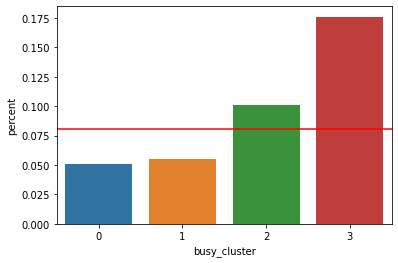

In [158]:
late_shipment_busy = shipment_busy.query("shipment_status == 'Late'")
sns.barplot(data =late_shipment_busy, x= "busy_cluster", y ="percent" )
plt.axhline( y= pie_shipment["Late"], color = "red")

**💫 Finding**

During busy order time, the rate of late shipment increased significantly.
The rate of late shipment during the busiest cluster is nearly 20%.

Is it because of the processing time ? or the transport time of the carrier ?

In [159]:
unique_order.groupby("busy_cluster")["processing_time"].mean()

busy_cluster
0    3.334752
1    2.775245
2    2.593467
3    3.728889
Name: processing_time, dtype: float64

This is interesting - During the days with high number of orders, on average it takes an extra day for the orders to be processed and sent to the carrier

In [160]:
unique_order.groupby("busy_cluster")["processing_time"].mean()

busy_cluster
0    3.334752
1    2.775245
2    2.593467
3    3.728889
Name: processing_time, dtype: float64

In [161]:
unique_order.groupby('day_type')["processing_time"].mean()

day_type
Weekdays    2.600847
Weekends    3.133439
Name: processing_time, dtype: float64

In [162]:
day_busy_cluster = unique_order.groupby(["day_type","busy_cluster"]).size()
day_busy_cluster = day_busy_cluster.groupby(level=[0]).apply(lambda g: g / g.sum())
day_busy_cluster = day_busy_cluster.reset_index(name = "count")

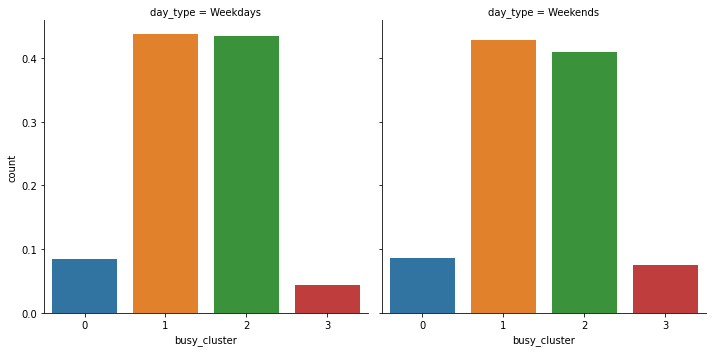

In [163]:
sns.catplot( data = day_busy_cluster, x = "busy_cluster", y = "count", kind = "bar", col = "day_type")

The percent of very busy days during the weekends is nearly double that in weekdays

In [164]:
unique_order.sample(1)

,order_id,item_count,purchase_time,order_item_id,delivery_time,estimated_delivery_time,shipping_distance,distance_cluster,product_id,price,price_cluster,freight_value,product_category,product_weight_g,review_score,seller_id,seller_city,seller_state,customer_id,customer_unique_id,customer_city,customer_state,day_of_week,day_type,shipping_limit,processing_time,estimated_time,delivery_diff,send_survey,submit_review,size,size_cluster,frequency,frequency_cluster,week_day,busy_cluster,shipping_speed,shipment_status,order_month_year
31890,0588a3721b3d0a1f0b549fb84fd9cf10,1,2017-12-23 18:27:54,1,2017-12-29 15:58:25,2018-01-22,350.360378,0,236f3599e6d57eeb5eb9535b2c88b231,94.9,0,14.41,toys,300.0,5.0,0432ead42b6c8a0bdf68154add917fdf,maua,SP,7ba8828b204ff74e292e6a82f84415de,10f31bf1a6e4ca208d738fd5d453c9e6,curitiba,PR,5,Weekends,6.0,2.893981,29.186782,-23.334433,0.334433,0.782234,6137.0,0,4,0,2017-51,1,37.903945,On time,2017-12


- **DISTANCE**

In [165]:
shipment_distance = unique_order.groupby("distance_cluster")["shipment_status"].value_counts()
shipment_distance = shipment_distance.groupby(level=[0]).apply(lambda g: g / g.sum())
shipment_distance = shipment_distance.reset_index(name="percent")
shipment_distance

,distance_cluster,shipment_status,percent
0,0,On time,0.930526
1,0,Late,0.069474
2,1,On time,0.913554
3,1,Late,0.086446
4,2,On time,0.868034
5,2,Late,0.131966


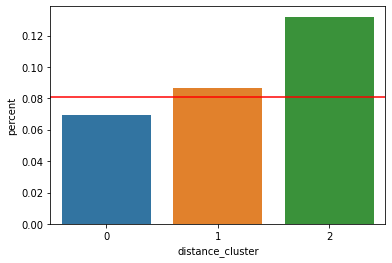

In [166]:
late_shipment_distance = shipment_distance.query("shipment_status == 'Late'")
sns.barplot(data =late_shipment_distance, x= "distance_cluster", y ="percent" )
plt.axhline( y= pie_shipment["Late"], color = "red")

In [167]:
#Export to drive
distance_cluster = unique_order.groupby('distance_cluster')['shipping_distance'].describe().reset_index()
distance_cluster.to_csv('/content/gdrive/MyDrive/Olist/distance_cluster.csv')

**💫 Finding**

For orders with long distance shipping, the delivery estimation is not so accurate and the late develiery ratio is high

What happened if we deliver much earlier than estimated delivery date ?

In [168]:
early_delivery = delivery_comment_df[delivery_comment_df["delivery_diff"] <0]

In [169]:
early_delivery["delivery_diff"].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])

0.1   -21.917204
0.2   -18.275813
0.3   -15.406541
0.4   -13.584113
0.5   -12.320116
0.6   -10.494074
0.7    -8.938970
0.8    -7.064102
0.9    -5.001965
Name: delivery_diff, dtype: float64

In [170]:
def how_early(row):
  if row["delivery_diff"] >= -3 :
    return "Less than 3 days"
  elif row["delivery_diff"] >= -7 :
    return "Less than a week"
  elif row["delivery_diff"] >= -14 :
    return "Less than two weeks"
  elif row["delivery_diff"] >= -21 :
    return "Less than three weeks"
  else:
    return "More than three weeks"

In [171]:
early_delivery["how_early"] = early_delivery.apply(how_early, axis = 1)

In [172]:
#No significant different in the avg rating
early_delivery.groupby(["product_category","how_early"])["review_score"].mean()

product_category            how_early            
agro_industry_and_commerce  Less than 3 days         4.000000
                            Less than a week         4.029412
                            Less than three weeks    4.300000
                            Less than two weeks      4.164179
                            More than three weeks    4.521739
                                                       ...   
watches_gifts               Less than 3 days         4.202749
                            Less than a week         4.149068
                            Less than three weeks    4.384990
                            Less than two weeks      4.266862
                            More than three weeks    4.254054
Name: review_score, Length: 341, dtype: float64

Task: Compare the late shipment ratio & the customer satisfaction among different busy cluster, size, and distance

### **3.3.2 THEORIES AND RELATED RESEARCH RELATED TO DELIVERY ESTIMATION**

**On-time orders Vs. Competitiveness**

Estimating the delivery date is slightly tricky and a certain balance needs to be maintained to ensure the order is not late while also quoting as competitive of a lead time as possible. When a customer places an order and gets the promised delivery date, we must fulfill it and deliver the order on-time: on or before the estimated date we provide (and, in some cases, within a specific date range). An easy solution for this challenge is to provide the customer with a long delivery time. For example, if we think the product can be delivered in a week, we can provide a delivery date of a month out to minimize the risk of being late. However, if the customer can get a comparable product from a competitor in a shorter time-frame, we might lose the sale.

(Source: https://towardsdatascience.com/delivery-date-estimation-5aff1a0ff8dc)

> **There is a constant trade-off between being accurate and being competitive and, of course, we would aim to optimize both.**

The vast majority of machine learning algorithms are constructed with a symmetric cost function optimization. In this case, the cost of either direction of the error is the same- an error of being X days late or X days early is the same. In our case, there is an error perceived to be costlier: we would rather deliver the order early than be late. 

🚨 We encoded this business logic in the machine learning models by creating a custom asymmetric cost function that penalizes late orders more than early orders.

![](https://miro.medium.com/max/1400/1*vejH5koYbzil680FhOpNBA.png)

We would like to keep the late orders percentage very low, while as in any optimization problem, we would also like to minimize the cost function as much as we can to have zero loss. This way we would be able to provide the customer with an accurate and competitive delivery time.



> **Choosing the target variable**


The most intuitive target variable is the order cycle time (the total number of days an order takes from order entry to final delivery). However, to accurately predict this time, we should consider two aspects:
- **Unit of Measure**: Products are built and delivered during business days, thus our target variable should be computed to include business days only. This way, we remove the effect of weekends and holidays on our estimation of the delivery date.
- **Cycle Time Definition**: The total delivery time can be split into two main sections: build/preparation time (time between order entry and the order being shipped) and shipping time (time from when an order is shipped to when the customer receives the order). As shipping time is generally controlled by more general factors (shipping provider, weather, shipping type, etc). The suggestion is to use a main model for the prediction of the orders’ build/preparation time and use an additional sub-model to predict the shipping time after it leaves the factory (this model will depend on other factors that are more relevant for this specific problem).

![](https://miro.medium.com/max/1400/1*CIwE7FPlJBxlgDrWXwu8xw.png)

**GOAL:** to increase accuracy and deliver our products on-time, while maintaining competitiveness delivery times. To do so, we used an asymmetric cost function to predict a chosen target variable and best-mimic the real-world behavior by using a unique train\test splitting approach.


> **How to evaluate the model?**

For our analysis, we decided to train and implement multiple machine learning models, consisting of 

Linear Regression

Ridge Regression

Least Absolute Shrinkage and 

Selection Operator (LASSO) Regression, 

Artificial Neural Net, Random Forest, Gradient Boosting Model (GBM), Support Vector Machine (SVM), and a final ensemble model. To score the model, we not only looked at RMSE (Root-mean-square deviation), but also calculated the percentages of instances the predicted lead time fell between +/- 7, 10, and 14 days of the actual lead time.

This method of scoring was requested by the company partner, and would help determine if the models could properly measure within an industry-acceptable threshold of days if implemented for real-world problems. For consistency, each of the models were performed on the product line with the largest number of entries, with the results corresponding to only this product.

Source (https://krannert.purdue.edu/masters/business-analytics-and-information-management/student-experiences/experiential-learning/2018/a-machine-learning-approach-to-delivery-time-estimation-for-industrial-equipment.php)

### **3.3.3 BUILDING MACHINE LEARNING MODEL FOR DELIVERY DATE ESTIMATION**

In [173]:
historical_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110133 entries, 0 to 110132
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 110133 non-null  object        
 1   item_count               110133 non-null  int64         
 2   purchase_time            110133 non-null  datetime64[ns]
 3   order_item_id            110133 non-null  int64         
 4   delivery_time            110133 non-null  datetime64[ns]
 5   estimated_delivery_time  110133 non-null  datetime64[ns]
 6   shipping_distance        110133 non-null  float64       
 7   distance_cluster         110133 non-null  int64         
 8   product_id               110133 non-null  object        
 9   price                    110133 non-null  float64       
 10  price_cluster            110133 non-null  int64         
 11  freight_value            110133 non-null  float64       
 12  product_category

In [174]:
#Filter out outlier
historical_order_no_outlier = historical_order[(lower < historical_order["delivery_diff"]) & (historical_order["delivery_diff"] < upper)]

In [175]:
historical_order_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104571 entries, 0 to 110132
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 104571 non-null  object        
 1   item_count               104571 non-null  int64         
 2   purchase_time            104571 non-null  datetime64[ns]
 3   order_item_id            104571 non-null  int64         
 4   delivery_time            104571 non-null  datetime64[ns]
 5   estimated_delivery_time  104571 non-null  datetime64[ns]
 6   shipping_distance        104571 non-null  float64       
 7   distance_cluster         104571 non-null  int64         
 8   product_id               104571 non-null  object        
 9   price                    104571 non-null  float64       
 10  price_cluster            104571 non-null  int64         
 11  freight_value            104571 non-null  float64       
 12  product_category

In [176]:
historical_order_no_outlier.head(5)

,order_id,item_count,purchase_time,order_item_id,delivery_time,estimated_delivery_time,shipping_distance,distance_cluster,product_id,price,price_cluster,freight_value,product_category,product_weight_g,review_score,seller_id,seller_city,seller_state,customer_id,customer_unique_id,customer_city,customer_state,day_of_week,day_type,shipping_limit,processing_time,estimated_time,delivery_diff,send_survey,submit_review,size,size_cluster,frequency,frequency_cluster,week_day,busy_cluster,shipping_speed
0,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,1,2017-10-10 21:25:13,2017-10-18,18.566632,0,87285b34884572647811a353c7ac498a,29.99,0,8.72,housewares,500.0,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0,Weekdays,4.000000,2.366493,15.536632,-7.107488,0.107488,1.155417,4693.0,0,4,0,2017-40,1,20.097549
1,ad21c59c0840e6cb83a9ceb5573f8159,1,2018-02-13 21:18:39,1,2018-02-16 18:17:02,2018-02-26,29.684401,0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,0,8.72,stationery,250.0,5.0,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,Weekdays,5.924398,0.893113,12.069109,-9.238171,0.238171,1.543646,39015.0,0,40,1,2018-06,2,20.097549
2,6514b8ad8028c9f2cc2374ded245783f,1,2017-05-16 13:10:30,1,2017-05-26 12:55:51,2017-06-07,322.781779,0,4520766ec412348b8d4caa5e8a18c464,59.99,0,15.17,auto,50.0,5.0,16090f2ca825584b5a147ab24aa30c86,atibaia,SP,9bdf08b4b3b52b5526ff42d37d47f222,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ,1,Weekdays,6.000000,5.864988,21.442928,-11.461215,0.461215,1.124965,4352.0,0,53,1,2017-20,1,28.218184
3,82566a660a982b15fb86e904c8d32918,1,2018-06-07 10:06:19,1,2018-06-19 12:05:52,2018-07-18,452.355874,0,72a97c271b2e429974398f46b93ae530,31.90,0,18.23,perfumery,450.0,5.0,094ced053e257ae8cae57205592d6712,ribeirao preto,SP,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG,3,Weekdays,9.000000,2.427639,38.865833,-28.495926,0.495926,0.646863,4096.0,0,1,0,2018-22,2,41.731070
4,5ff96c15d0b717ac6ad1f3d77225a350,1,2018-07-25 17:44:10,1,2018-07-30 15:52:25,2018-08-08,308.760320,0,10adb53d8faa890ca7c2f0cbcb68d777,19.90,0,12.80,bed_bath_table,200.0,5.0,1900267e848ceeba8fa32d80c1a5f5a8,ibitinga,SP,19402a48fe860416adf93348aba37740,e2dfa3127fedbbca9707b36304996dab,sao paulo,SP,2,Weekdays,2.000000,0.806088,13.253310,-8.338600,0.338600,2.885556,4096.0,0,20,1,2018-29,2,20.097549


In [177]:
def same_state(row):
  if row["seller_state"] == row["customer_state"]:
    return 1
  else:
    return 0

In [178]:
historical_order_no_outlier["same_state"] = historical_order_no_outlier.apply(same_state, axis = 1)

In [179]:
accummulated = historical_order_no_outlier.groupby("order_id")[["price","freight_value","product_weight_g","size"]].sum().reset_index()
accummulated

,order_id,price,freight_value,product_weight_g,size
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,10976.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,100000.0
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,35937.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,200.0,3840.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,36750.0
...,...,...,...,...,...
91556,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,10150.0,316840.0
91557,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,8950.0,76950.0
91558,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,967.0,8379.0
91559,fffe18544ffabc95dfada21779c9644f,55.99,8.72,100.0,8000.0


In [180]:
unique_order_id = historical_order_no_outlier.drop_duplicates(subset = "order_id", keep='first')

In [181]:
unique_order_id["same_state"] = unique_order_id.apply(same_state, axis = 1)

In [182]:
unique_order_id.head()

,order_id,item_count,purchase_time,order_item_id,delivery_time,estimated_delivery_time,shipping_distance,distance_cluster,product_id,price,price_cluster,freight_value,product_category,product_weight_g,review_score,seller_id,seller_city,seller_state,customer_id,customer_unique_id,customer_city,customer_state,day_of_week,day_type,shipping_limit,processing_time,estimated_time,delivery_diff,send_survey,submit_review,size,size_cluster,frequency,frequency_cluster,week_day,busy_cluster,shipping_speed,same_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,1,2017-10-10 21:25:13,2017-10-18,18.566632,0,87285b34884572647811a353c7ac498a,29.99,0,8.72,housewares,500.0,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0,Weekdays,4.000000,2.366493,15.536632,-7.107488,0.107488,1.155417,4693.0,0,4,0,2017-40,1,20.097549,1
1,ad21c59c0840e6cb83a9ceb5573f8159,1,2018-02-13 21:18:39,1,2018-02-16 18:17:02,2018-02-26,29.684401,0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,0,8.72,stationery,250.0,5.0,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,Weekdays,5.924398,0.893113,12.069109,-9.238171,0.238171,1.543646,39015.0,0,40,1,2018-06,2,20.097549,1
2,6514b8ad8028c9f2cc2374ded245783f,1,2017-05-16 13:10:30,1,2017-05-26 12:55:51,2017-06-07,322.781779,0,4520766ec412348b8d4caa5e8a18c464,59.99,0,15.17,auto,50.0,5.0,16090f2ca825584b5a147ab24aa30c86,atibaia,SP,9bdf08b4b3b52b5526ff42d37d47f222,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ,1,Weekdays,6.000000,5.864988,21.442928,-11.461215,0.461215,1.124965,4352.0,0,53,1,2017-20,1,28.218184,0
3,82566a660a982b15fb86e904c8d32918,1,2018-06-07 10:06:19,1,2018-06-19 12:05:52,2018-07-18,452.355874,0,72a97c271b2e429974398f46b93ae530,31.90,0,18.23,perfumery,450.0,5.0,094ced053e257ae8cae57205592d6712,ribeirao preto,SP,d3e3b74c766bc6214e0c830b17ee2341,e97109680b052ee858d93a539597bba7,ouro preto,MG,3,Weekdays,9.000000,2.427639,38.865833,-28.495926,0.495926,0.646863,4096.0,0,1,0,2018-22,2,41.731070,0
4,5ff96c15d0b717ac6ad1f3d77225a350,1,2018-07-25 17:44:10,1,2018-07-30 15:52:25,2018-08-08,308.760320,0,10adb53d8faa890ca7c2f0cbcb68d777,19.90,0,12.80,bed_bath_table,200.0,5.0,1900267e848ceeba8fa32d80c1a5f5a8,ibitinga,SP,19402a48fe860416adf93348aba37740,e2dfa3127fedbbca9707b36304996dab,sao paulo,SP,2,Weekdays,2.000000,0.806088,13.253310,-8.338600,0.338600,2.885556,4096.0,0,20,1,2018-29,2,20.097549,1


In [183]:
unique_order_id = unique_order_id[["order_id","item_count","shipping_distance","day_type","distance_cluster","day_of_week", "shipping_limit","estimated_time","delivery_diff","busy_cluster","same_state","shipping_speed"]]

In [184]:
#Prepare data for ML
merge_data = accummulated.merge(unique_order_id, on = "order_id", how = "left")
#Create new columns:
merge_data["delivery_time"] = merge_data["estimated_time"] + merge_data["delivery_diff"]
#Modify categorial columns
merge_data.day_type = merge_data.day_type.replace({"Weekends": 1, "Weekdays":0})
merge_data.rename(columns = {"day_type":"weekend"}, inplace = True)
merge_data.busy_cluster = merge_data.busy_cluster.replace({0: "Low", 1:"Moderate",2:"High",3:"Very high"})
#Drop unused features
merge_data.drop(columns = ['order_id', 'price', 'delivery_diff'], inplace = True)
#Filter out <0 values in delivery_time
merge_data =  merge_data[merge_data["delivery_time"] >0]

In [185]:
# merge_data.delivery_time.plot(kind= hist)

MODEL TRAINING

In [186]:
merge_data.head(2)

,freight_value,product_weight_g,size,item_count,shipping_distance,weekend,distance_cluster,day_of_week,shipping_limit,estimated_time,busy_cluster,same_state,shipping_speed,delivery_time
0,13.29,650.0,10976.0,1,301.858959,0,0,2,6.0,15.593345,Moderate,0,28.218184,7.582095
1,19.93,30000.0,100000.0,1,585.131104,0,1,2,7.0,18.538044,Low,1,20.097549,16.207766


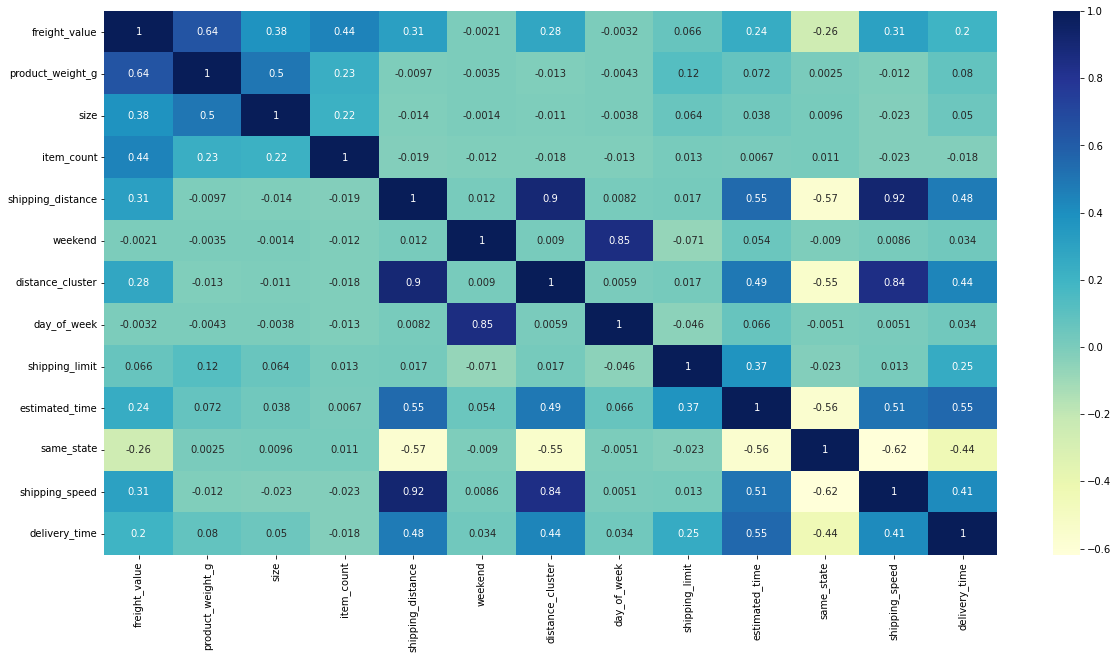

In [187]:
corrMatrix = merge_data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.api as sm

# # Use variable X to store your input, and y to store the column you want to predict ('delivery time')
X = merge_data.iloc[:,:14]
y = merge_data["delivery_time"]
#let's split this dataset into a train set and a test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# First import the scaler
from sklearn.preprocessing import StandardScaler
num_features = ['freight_value','product_weight_g','size', 'item_count','shipping_distance',"shipping_limit","estimated_time","shipping_speed"]
#Now, we will scale all the numerical features we define above, on train set
scaler = StandardScaler()
#We will use the fresh scaler object to scale the numerical features on X_train
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
# Transform on test set
X_test_num_scaled = scaler.transform(X_test[num_features])
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Identify categorical 
cat_features = ['busy_cluster','distance_cluster','day_of_week']
# Create our encoder. 
# It's common to set handle_unknown='ignore' to be safe.
encoder = OneHotEncoder(handle_unknown='ignore')
# Process our categorical features using encoder
# This is similar to how we process numerical features using scaler
X_train_cat_1hot = encoder.fit_transform(X_train[cat_features])
# Convert to numpy.ndarray
X_train_cat_1hot = X_train_cat_1hot.toarray()
#Same as above, we will use the `encoder` object that we already use on **train set**, to **transform** the test set
X_test_cat_1hot = encoder.transform(X_test[cat_features])
X_test_cat_1hot = X_test_cat_1hot.toarray()
# These are the features that have not been touched during our encoding/normalizing
remaining_features = ["weekend","same_state"]
X_train_remained = X_train[remaining_features].values
#Let's concatenate all the subset of the preprocessed data together, to form the final training data.
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_1hot,X_train_remained],axis=1)
X_test_remained = X_test[remaining_features].values
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_1hot,X_test_remained],axis=1)
y_train= y_train.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)

# build and train model
lg = LinearRegression()
lg.fit(X_train_final, y_train)

print("Linear Regression Model")

print(f'Coef: {lg.coef_}')
print(f'Intercept: {lg.intercept_}')

# test model
y_pred = lg.predict(X_test_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("training set score: %f" % lg.score(X_train_final, y_train))
print("test set score: %f" % lg.score(X_test_final, y_test))

# interpret model
X2 = sm.add_constant(X_train_final)
model_stats = sm.OLS(y_train, X2).fit()
print(model_stats.summary())
print("\n")

# from sklearn.linear_model import Lasso
# lasso = Lasso().fit(X_train_final, y_train)
# print("training set score: %f" % lasso.score(X_train_final, y_train))
# print("test set score: %f" % lasso.score(X_test_final, y_test))
# print("number of features used: %d" % np.sum(lasso.coef_ != 0))

import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor()]
    # linear_model.TheilSenRegressor()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train_final, y_train)
    y_pred = clf.predict(X_test_final)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("training set score: %f" % clf.score(X_train_final, y_train))
    print("test set score: %f" % clf.score(X_test_final, y_test))
    print("number of features used: %d" % np.sum(clf.coef_ != 0))
    print('\n')

Linear Regression Model
Coef: [[-0.14688855  0.38591162  0.13907061 -0.21335889  3.14550697  0.94022218
   1.94369429 -1.8223125  -0.11516394 -0.73462666 -1.02434118  1.87413179
  -0.2206488  -0.02606722  0.24671602 -0.00723675 -0.17277289 -0.1476457
   0.1510906   0.2919256   0.09275751 -0.20811835  0.17656475 -2.65825147]]
Intercept: [12.66916741]
Mean Absolute Error: 4.080208500761224
Mean Squared Error: 30.080271773906304
Root Mean Squared Error: 5.484548456701455
training set score: 0.395196
test set score: 0.398824
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2391.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:55:33   Log-Likelihood:            -2.2777e+05

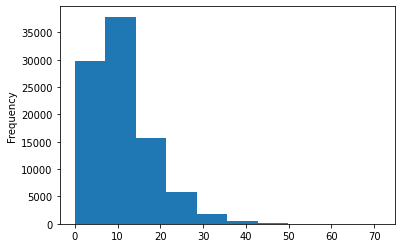

In [189]:
merge_data.delivery_time.plot(kind = 'hist')

In [190]:
print("CURRENT ESTIMATION PERFORMANCE")
print('Mean Absolute Error:', metrics.mean_absolute_error(merge_data["delivery_time"], merge_data["estimated_time"]))
print('Mean Squared Error:', metrics.mean_squared_error(merge_data["delivery_time"], merge_data["estimated_time"]))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(merge_data["delivery_time"], merge_data["estimated_time"])))

CURRENT ESTIMATION PERFORMANCE
Mean Absolute Error: 11.943904009815824
Mean Squared Error: 184.7602718796634
Root Mean Squared Error: 13.592655071017708


In [191]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# rfr = RandomForestRegressor()
# # Define the hyperparameters
# rfr.fit(X_train_final, y_train)
# y_pred = clf.predict(X_test_final)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("training set score: %f" % rfr.score(X_train_final, y_train))
# print("test set score: %f" % rfr.score(X_test_final, y_test))
# print("number of features used: %d" % np.sum(rfr.coef_ != 0))
# print('\n')

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train_final, y_train)
y_pred = svr.predict(X_test_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("training set score: %f" % svr.score(X_train_final, y_train))
print("test set score: %f" % svr.score(X_test_final, y_test))
print("number of features used: %d" % np.sum(svr.coef_ != 0))
print('\n')

Mean Absolute Error: 3.9837646709929846
Mean Squared Error: 31.581336494937158
Root Mean Squared Error: 5.619727439559427


(*) Analyze the current MAE before using machine learning

In [ ]:

X_num_scaled = scaler.fit_transform(X[num_features])
X_cat_1hot = encoder.fit_transform(X[cat_features])
# Convert to numpy.ndarray
X_cat_1hot = X_cat_1hot.toarray()
X_remained = X[remaining_features].values
#Let's concatenate all the subset of the preprocessed data together, to form the final training data.
X_final = np.concatenate([X_num_scaled,X_cat_1hot,X_remained],axis=1)
y_full = lg.predict(X_final)

In [ ]:
y_predict = y_full.flatten() 

In [ ]:
y_actual = y.to_numpy()
y_actual

In [ ]:
y_predict

In [ ]:
# new = np.concatenate((y_predict,y_actual),axis=1)
coompare_dataset = pd.DataFrame({'actual': y_actual, 'estimate': list(y_predict)}, columns=['actual', 'estimate'])

In [ ]:
coompare_dataset.to_csv('/content/gdrive/MyDrive/Olist/compare_dataset.csv')

## 4. CONCLUSION & NEXT STEPS

**💫 CONCLUSION**

* Late delivery has a significant impact on the customer satisfaction  measured  by rating score

* Olist should consider being less conservative in delivery estimation to become more competitive

* However, that needs to be carefully implemented to avoid increased in late shipment ratio

**💫 RECOMMENDATION**

* Trial the ML prediction model in cities with medium sales volumes, focusing on critical categories with high inaccuracy in prediction

**💫 WHAT's NEXT?**

* Collect data of more features (weather, holiday, number of carriers in each area, ...)
* Devide the shipment process into small pieces: preparation from seller to forwarder, from forwarder to carrier, then to customer so that we can optimize prediction for each state
* Customize the loss function so that penalty should be emphasized more on late delivery (consider using Hinge Loss Function)


